##Imports and Loading

In [ ]:
!pip install pandas-profiling mglearn openpyxl

In [ ]:
#libraries
import pandas as pd
#from pandas_profiling import ProfileReport

import numpy as np

import scipy as sp
from scipy.stats import spearmanr

import seaborn as sns

import math

from datetime import datetime
import calendar

import matplotlib
import matplotlib.pyplot as plt

import os

import sklearn
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import mglearn




import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


from itertools import product

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

#import ace_tools as tools

In [ ]:
# Load the Excel file
file_path = '/content/Case4_UNL-IMS - Data - delivery v2.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names to understand the structure
sheet_names = xls.sheet_names
sheet_names

['Q1 - Task execution data',
 'Q2 - User information',
 'Q3 - Specific request data',
 'Q4 - Rejections']

In [ ]:
# Load each sheet into a DataFrame with a smaller sample to avoid timeout issues
df_task_execution = pd.read_excel(file_path, sheet_name='Q1 - Task execution data')
df_user_info = pd.read_excel(file_path, sheet_name='Q2 - User information')
df_request_data = pd.read_excel(file_path, sheet_name='Q3 - Specific request data')
df_rejections = pd.read_excel(file_path, sheet_name='Q4 - Rejections')

# Display the first few rows of each DataFrame to understand their structure
df_task_execution_head = df_task_execution.head()
df_user_info_head = df_user_info.head()
df_request_data_head = df_request_data.head()
df_rejections_head = df_rejections.head()

df_task_execution_head, df_user_info_head, df_request_data_head, df_rejections_head

(   Task Id  Request Identifier        Task arrival date  \
 0  1584303                   1  2022-04-11 16:02:13.820   
 1  1584304                   1  2022-04-11 16:02:14.743   
 2  1585980                   1  2022-04-12 10:02:55.530   
 3  1586077                   1  2022-04-12 10:17:16.427   
 4  1671448                   1  2022-05-10 13:43:32.627   
 
          Task capture date  Task execution end date  Task predicted end date  \
 0  2022-04-11 16:02:13.820  2022-04-11 16:02:13.820                      NaN   
 1  2022-04-12 09:29:40.683  2022-04-12 10:02:54.687  2022-04-12 14:02:14.803   
 2  2022-04-12 10:14:39.290  2022-04-12 10:17:16.050  2022-04-12 17:02:55.577   
 3  2022-04-12 10:22:47.610  2022-05-10 13:43:32.203  2022-04-12 17:17:16.490   
 4  2022-05-10 13:47:53.570  2022-05-10 13:48:44.353  2022-05-17 08:43:32.737   
 
    Actvity ID  Task Executer  Task executer department        Task Type  \
 0         100         7638.0                     569.0  Initial Request  

###Merging



In [ ]:
# Left join on df_task_execution with df_rejections
left_joined = df_task_execution.merge(df_rejections, on='Task Id', how='left')
left_joined = left_joined.merge(df_request_data, on='Request Identifier', how='left')
left_joined = left_joined.merge(df_user_info, left_on='Task Executer', right_on='Task Executer', how='left')

left_joined.head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,idBPMApplicationAction,idBPMRequirement,idField,Value,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
0,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100,7638.0,569.0,Initial Request,...,270,NaN,1602,1,M,1967.0,5.0,Yes,2021.0,N
1,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100,7638.0,569.0,Initial Request,...,270,NaN,47,1,M,1967.0,5.0,Yes,2021.0,N
2,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100,7638.0,569.0,Initial Request,...,270,NaN,3486,10,M,1967.0,5.0,Yes,2021.0,N
3,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100,7638.0,569.0,Initial Request,...,270,NaN,3491,10,M,1967.0,5.0,Yes,2021.0,N
4,1584303,1,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100,7638.0,569.0,Initial Request,...,270,NaN,3388,10,M,1967.0,5.0,Yes,2021.0,N


In [ ]:
# Right join on df_task_execution with df_rejections
right_joined = df_task_execution.merge(df_rejections, on='Task Id', how='right')
right_joined = right_joined.merge(df_request_data, on='Request Identifier', how='right')
right_joined = right_joined.merge(df_user_info, left_on='Task Executer', right_on='Task Executer', how='right')

right_joined.head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,idBPMApplicationAction,idBPMRequirement,idField,Value,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1872.0,NaN,NaN,...,NaN,NaN,NaN,NaN,F,1988,1,Yes,2024,N
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11133.0,NaN,NaN,...,NaN,NaN,NaN,NaN,F,1975,1,Yes,2019,N
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10332.0,NaN,NaN,...,NaN,NaN,NaN,NaN,F,1978,2,Yes,2019,N
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10349.0,NaN,NaN,...,NaN,NaN,NaN,NaN,F,1976,3,Yes,2024,N
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1394.0,NaN,NaN,...,NaN,NaN,NaN,NaN,F,1984,4,Yes,2021,N


In [ ]:
# Concatenate the results, handling missing values appropriately
merged_df = left_joined.combine_first(right_joined)

# Display the first few rows of the final merged DataFrame
merged_df.head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,idBPMApplicationAction,idBPMRequirement,idField,Value,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
0,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100.0,7638.0,569.0,Initial Request,...,270.0,NaN,1602.0,1,M,1967.0,5.0,Yes,2021.0,N
1,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100.0,7638.0,569.0,Initial Request,...,270.0,NaN,47.0,1,M,1967.0,5.0,Yes,2021.0,N
2,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100.0,7638.0,569.0,Initial Request,...,270.0,NaN,3486.0,10,M,1967.0,5.0,Yes,2021.0,N
3,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100.0,7638.0,569.0,Initial Request,...,270.0,NaN,3491.0,10,M,1967.0,5.0,Yes,2021.0,N
4,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,NaN,100.0,7638.0,569.0,Initial Request,...,270.0,NaN,3388.0,10,M,1967.0,5.0,Yes,2021.0,N


##Data Exploration

In [ ]:
# Show summary statistics of the merged dataset
summary_statistics = merged_df.describe(include='all')
summary_statistics

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,idBPMApplicationAction,idBPMRequirement,idField,Value,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
count,1.376085e+06,1.376085e+06,1376085,1376085,1376085,1082702,1.376085e+06,1.254556e+06,1.208158e+06,1376085,...,1.376085e+06,39536.000000,1.376085e+06,1376085.0,1254556,1.254556e+06,1.254556e+06,1254556,1.254556e+06,1254556
unique,NaN,NaN,208936,202364,189229,148867,NaN,NaN,NaN,4,...,NaN,NaN,NaN,752.0,4,NaN,NaN,2,NaN,2
top,NaN,NaN,2023-10-16 16:42:00.000,2023-12-06 10:58:00.000,2023-12-06 10:58:00.000,2023-07-06 16:43:32.387,NaN,NaN,NaN,Execution,...,NaN,NaN,NaN,10.0,F,NaN,NaN,Yes,NaN,N
freq,NaN,NaN,318,24693,63861,81,NaN,NaN,NaN,887302,...,NaN,NaN,NaN,382595.0,886962,NaN,NaN,948449,NaN,948449
mean,3.401935e+06,2.333742e+04,NaN,NaN,NaN,NaN,1.027957e+02,6.662111e+03,7.576863e+02,NaN,...,1.097920e+03,254.872369,2.787228e+03,NaN,NaN,1.974563e+03,1.062251e+01,NaN,2.022207e+03,NaN
std,1.249349e+06,1.365793e+04,NaN,NaN,NaN,NaN,2.130051e+00,3.785380e+03,3.784517e+02,NaN,...,2.440576e+03,100.744279,1.276027e+03,NaN,NaN,7.094574e+00,7.766787e+00,NaN,2.346340e+00,NaN
min,1.584303e+06,1.000000e+00,NaN,NaN,NaN,NaN,1.000000e+02,1.000000e+00,5.000000e+00,NaN,...,2.700000e+02,183.000000,4.700000e+01,NaN,NaN,1.933000e+03,1.000000e+00,NaN,1.970000e+03,NaN
25%,2.317090e+06,1.134700e+04,NaN,NaN,NaN,NaN,1.020000e+02,4.322000e+03,5.110000e+02,NaN,...,2.730000e+02,183.000000,3.388000e+03,NaN,NaN,1.970000e+03,5.000000e+00,NaN,2.022000e+03,NaN
50%,3.198838e+06,2.324500e+04,NaN,NaN,NaN,NaN,1.030000e+02,7.838000e+03,6.900000e+02,NaN,...,2.820000e+02,300.000000,3.390000e+03,NaN,NaN,1.975000e+03,6.000000e+00,NaN,2.023000e+03,NaN
75%,4.175989e+06,3.592500e+04,NaN,NaN,NaN,NaN,1.040000e+02,1.060600e+04,1.146000e+03,NaN,...,3.000000e+02,300.000000,3.486000e+03,NaN,NaN,1.978000e+03,2.100000e+01,NaN,2.024000e+03,NaN


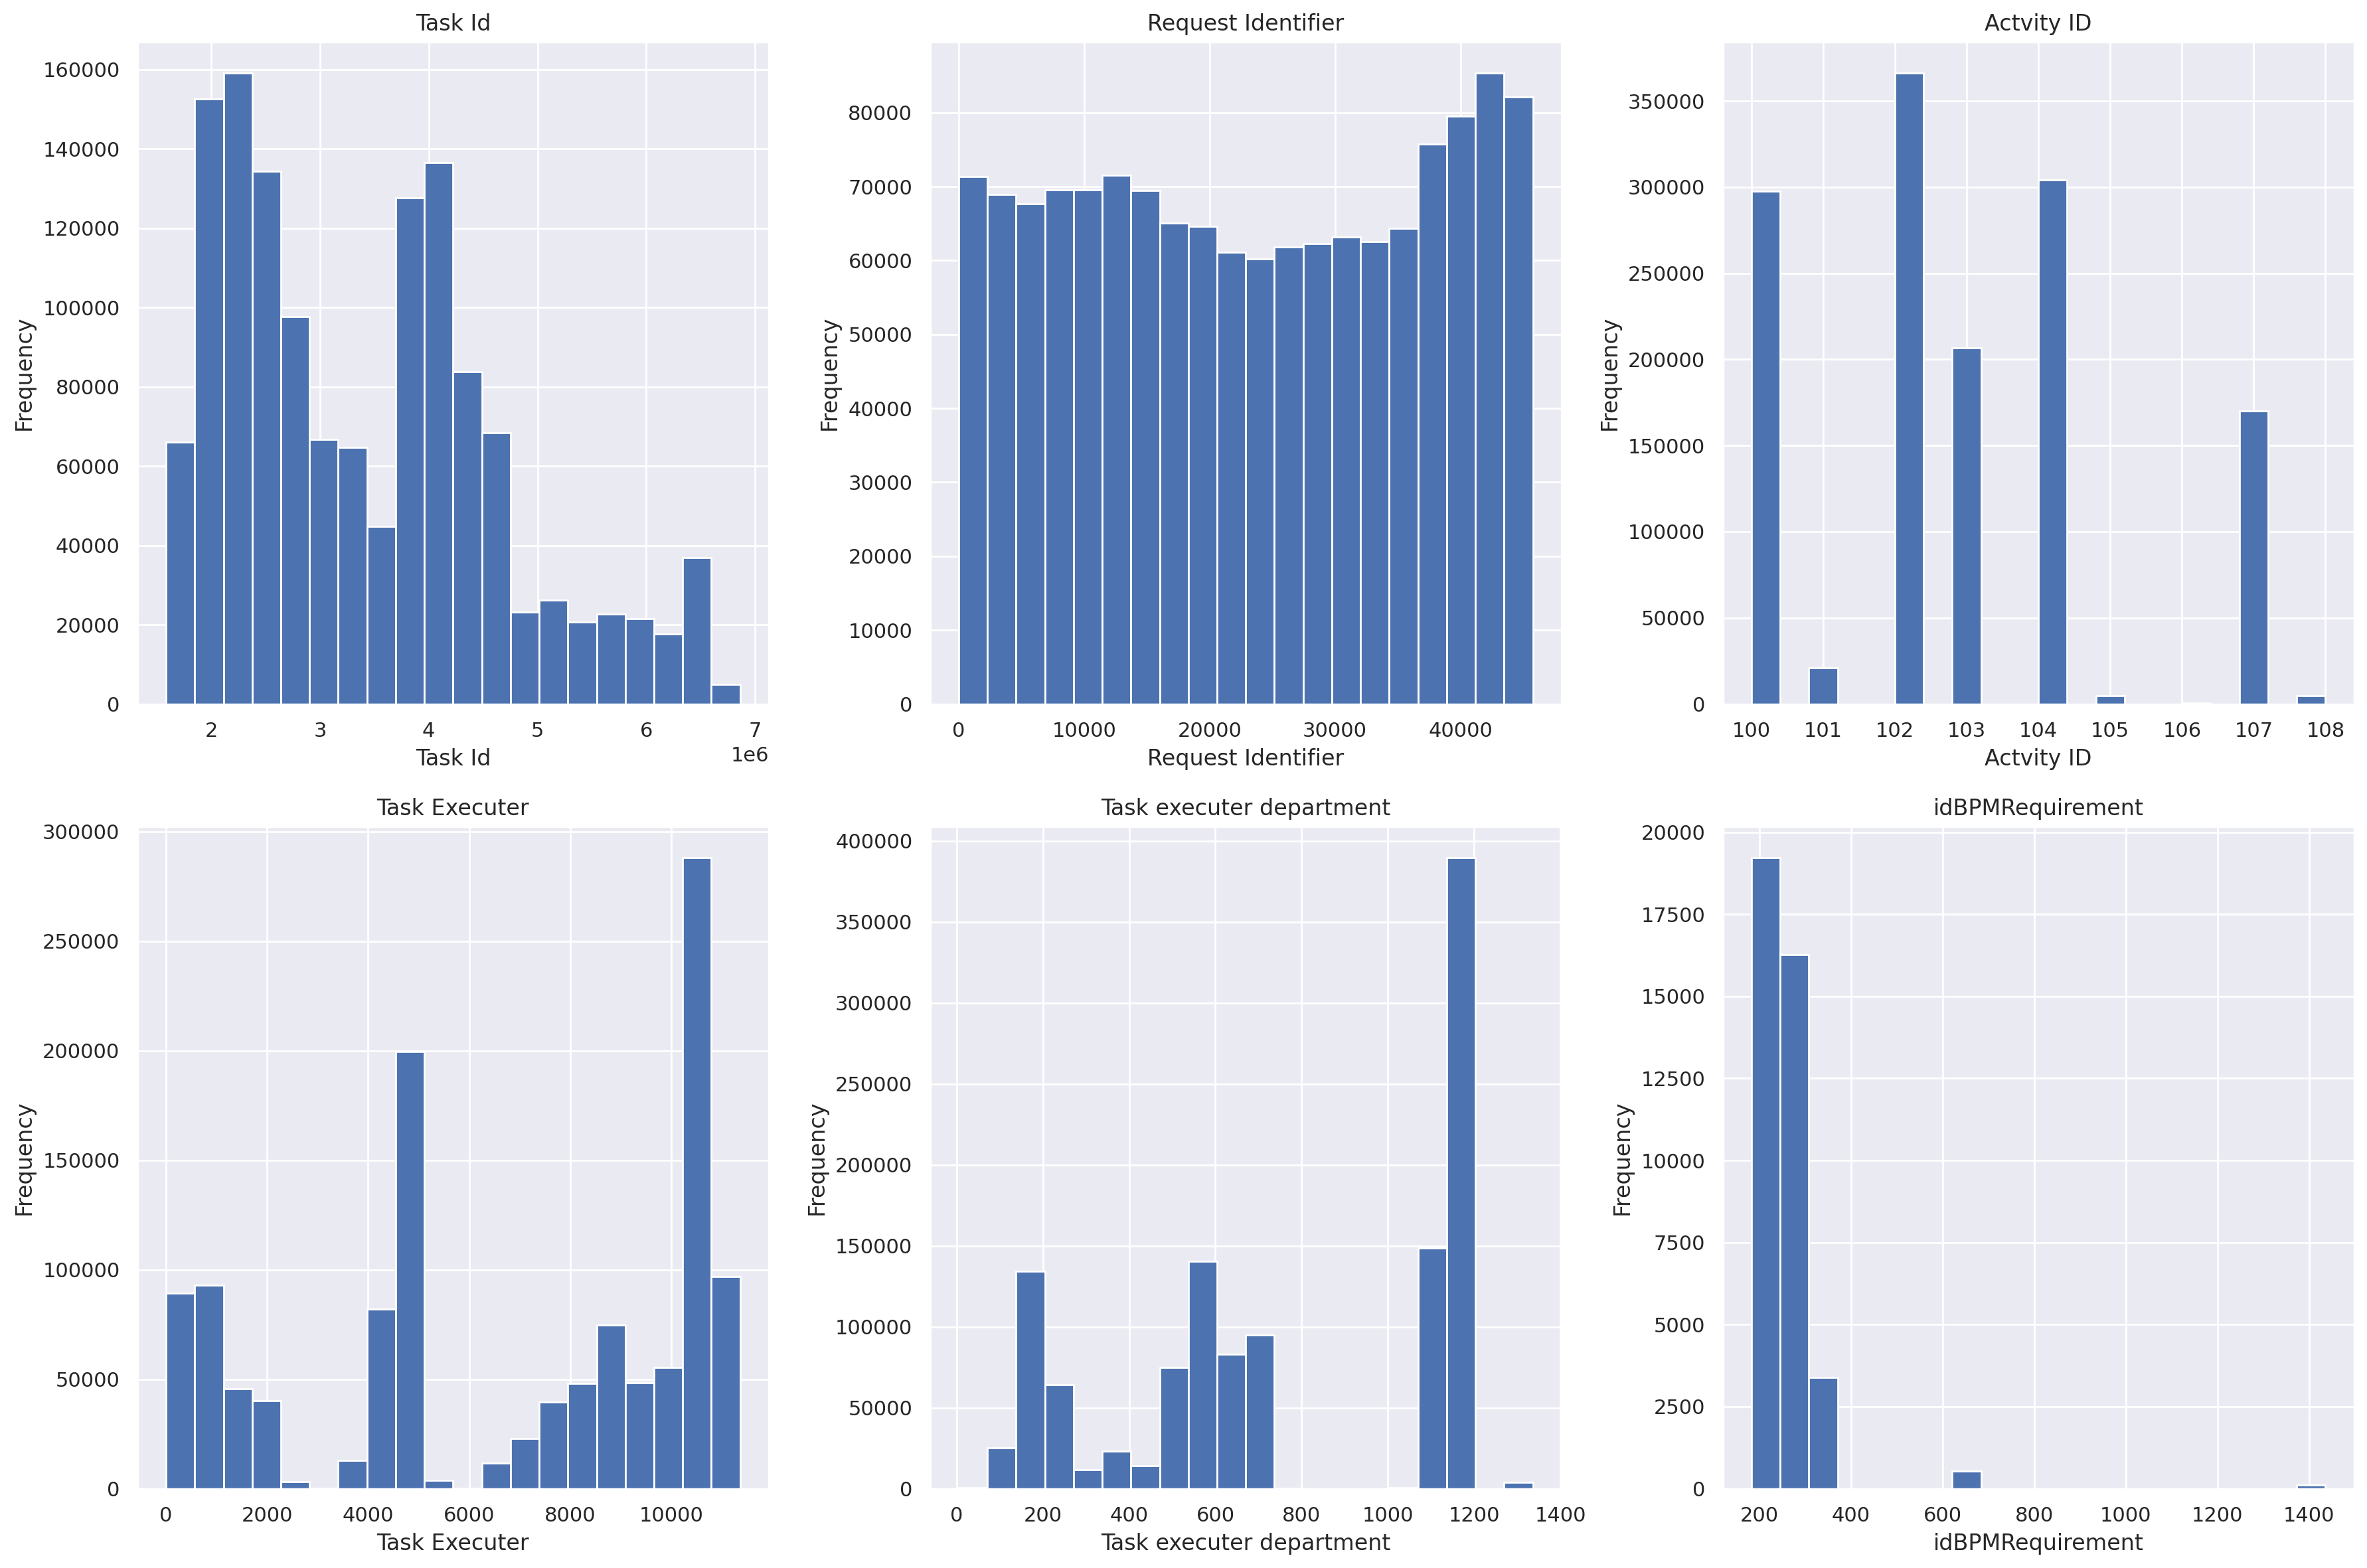

In [ ]:
import matplotlib.pyplot as plt

# Generate histograms for numerical columns
numerical_columns = ['Task Id', 'Request Identifier', 'Actvity ID', 'Task Executer', 'Task executer department', 'idBPMRequirement']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

for col, ax in zip(numerical_columns, axes.flatten()):
    merged_df[col].dropna().plot(kind='hist', bins=20, ax=ax, title=col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


##Missing Values

In [ ]:
merged_df.isna().sum()

Task Id                           0
Request Identifier                0
Task arrival date                 0
Task capture date                 0
Task execution end date           0
Task predicted end date      293383
Actvity ID                        0
Task Executer                121529
Task executer department     167927
Task Type                         0
Action                       554689
idBPMApplicationAction            0
idBPMRequirement            1336549
idField                           0
Value                             0
Sex                          121529
BirthYear                    121529
Role ID                      121529
Is Manager                   121529
OrgUnitSince                 121529
IsOutSourcer                 121529
dtype: int64

In [ ]:
# Replace the strange characters by NaN
strange_values_list = ["!","$","%","?","*","+","_","@","€"," ","{"]
merged_df.replace(strange_values_list,np.nan, inplace=True)

In [ ]:
merged_df.isna().sum() / len(merged_df) * 100

Task Id                      0.000000
Request Identifier           0.000000
Task arrival date            0.000000
Task capture date            0.000000
Task execution end date      0.000000
Task predicted end date     21.320122
Actvity ID                   0.000000
Task Executer                8.831504
Task executer department    12.203243
Task Type                    0.000000
Action                      40.309211
idBPMApplicationAction       0.000000
idBPMRequirement            97.126922
idField                      0.000000
Value                        0.000000
Sex                          8.833248
BirthYear                    8.831504
Role ID                      8.831504
Is Manager                   8.831504
OrgUnitSince                 8.831504
IsOutSourcer                 8.831504
dtype: float64

In [ ]:
# Identify numeric columns
#numeric_cols = merged_df.select_dtypes(include=['number']).columns

# Apply KNN imputer
#imputer = KNNImputer(n_neighbors=5)
#merged_df[numeric_cols] = imputer.fit_transform(merged_df[numeric_cols])

# Handle non-numeric columns
#categorical_cols = merged_df.select_dtypes(exclude=['number']).columns

# Fill missing categorical values with the most frequent value
#for col in categorical_cols:
#    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)

# Display the first few rows of the final imputed DataFrame
#merged_df.head()

Drop columns with more than 25% missing values and imputing missing values for numeric columns with mean and for categorical columns with mode

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = merged_df.isna().sum() / len(merged_df) * 100

# Drop columns with more than 25% missing values
columns_to_drop = missing_percentage[missing_percentage > 25].index
merged_df.drop(columns=columns_to_drop, inplace=True)

# Impute missing values for numeric columns with mean
numeric_cols = merged_df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    merged_df[col].fillna(merged_df[col].mean(), inplace=True)

# Impute missing values for categorical columns with mode
categorical_cols = merged_df.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)

# Display the first few rows of the final imputed DataFrame
merged_df.head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,idBPMApplicationAction,idField,Value,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer
0,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,Initial Request,270.0,1602.0,1,M,1967.0,5.0,Yes,2021.0,N
1,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,Initial Request,270.0,47.0,1,M,1967.0,5.0,Yes,2021.0,N
2,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,Initial Request,270.0,3486.0,10,M,1967.0,5.0,Yes,2021.0,N
3,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,Initial Request,270.0,3491.0,10,M,1967.0,5.0,Yes,2021.0,N
4,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,Initial Request,270.0,3388.0,10,M,1967.0,5.0,Yes,2021.0,N


In [ ]:
merged_df.isna().sum()

Task Id                     0
Request Identifier          0
Task arrival date           0
Task capture date           0
Task execution end date     0
Task predicted end date     0
Actvity ID                  0
Task Executer               0
Task executer department    0
Task Type                   0
idBPMApplicationAction      0
idField                     0
Value                       0
Sex                         0
BirthYear                   0
Role ID                     0
Is Manager                  0
OrgUnitSince                0
IsOutSourcer                0
dtype: int64

##Further Analysis and Transformation

In [ ]:
#Check to see if there a odd values in age
merged_df["BirthYear"].min(), merged_df["BirthYear"].max()

(1933.0, 2018.0)

In [ ]:
# Replace NaN values in 'BirthYear' with a default value if necessary
current_year = datetime.now().year

# Calculate Age and Round down (to match age)
merged_df['Age'] = np.floor(current_year - merged_df['BirthYear'])

# Display the DataFrame to verify the new column
print(merged_df[['BirthYear', 'Age']].head())

   BirthYear   Age
0     1967.0  57.0
1     1967.0  57.0
2     1967.0  57.0
3     1967.0  57.0
4     1967.0  57.0


In [ ]:
merged_df['Age'].value_counts()

Age
49.0    380910
46.0    131742
52.0    111621
57.0    110261
53.0     60846
55.0     56533
58.0     47702
50.0     47112
51.0     43976
47.0     42493
48.0     32625
44.0     26943
54.0     25707
45.0     25229
60.0     24494
56.0     22370
59.0     21811
42.0     20789
43.0     20459
41.0     17688
34.0     14083
24.0     10718
28.0      8288
27.0      7937
40.0      7645
61.0      7155
26.0      6471
30.0      4404
23.0      4353
64.0      4234
29.0      4123
36.0      3971
32.0      3528
39.0      2706
62.0      2679
37.0      2620
25.0      2127
31.0      2117
33.0      1533
63.0      1040
65.0      1020
35.0       817
22.0       728
38.0       343
20.0        66
21.0        36
91.0        21
66.0         3
73.0         1
19.0         1
67.0         1
69.0         1
71.0         1
6.0          1
77.0         1
11.0         1
Name: count, dtype: int64

In [ ]:
#Checking to see values of Sex
merged_df["Sex"].value_counts()

Sex
F    1008515
M     367565
U          5
Name: count, dtype: int64

In [ ]:
# Replace 'U' with NaN
merged_df['Sex'].replace('U', np.nan, inplace=True)

#Use the mode to fill it in since its a categorical values
mode_value = merged_df['Sex'].mode()[0]
merged_df['Sex'].fillna(mode_value, inplace=True)
print(f"Filled missing values with mode: {mode_value}", merged_df["Sex"].value_counts())

Filled missing values with mode: F Sex
F    1008520
M     367565
Name: count, dtype: int64


In [ ]:
merged_df["Is Manager"].value_counts(), merged_df["IsOutSourcer"].value_counts()

(Is Manager
 Yes    1069978
 No      306107
 Name: count, dtype: int64,
 IsOutSourcer
 N    1069978
 Y     306107
 Name: count, dtype: int64)

###Categorical Variables - Histograms

In [ ]:
categorical_cols = merged_df.select_dtypes(exclude=['number']).columns

In [ ]:
#for i in range(len(categorical_cols)):
#    sns.catplot(data=merged_df,y=categorical_cols[i],kind="count",height=8, aspect=1)

#title = "Categorical Variables' Histograms"

#plt.suptitle(title)

#plt.show()

###Numeric Variables - Histograms and Boxplots

In [ ]:
numeric_cols = merged_df.select_dtypes(include=['number']).columns

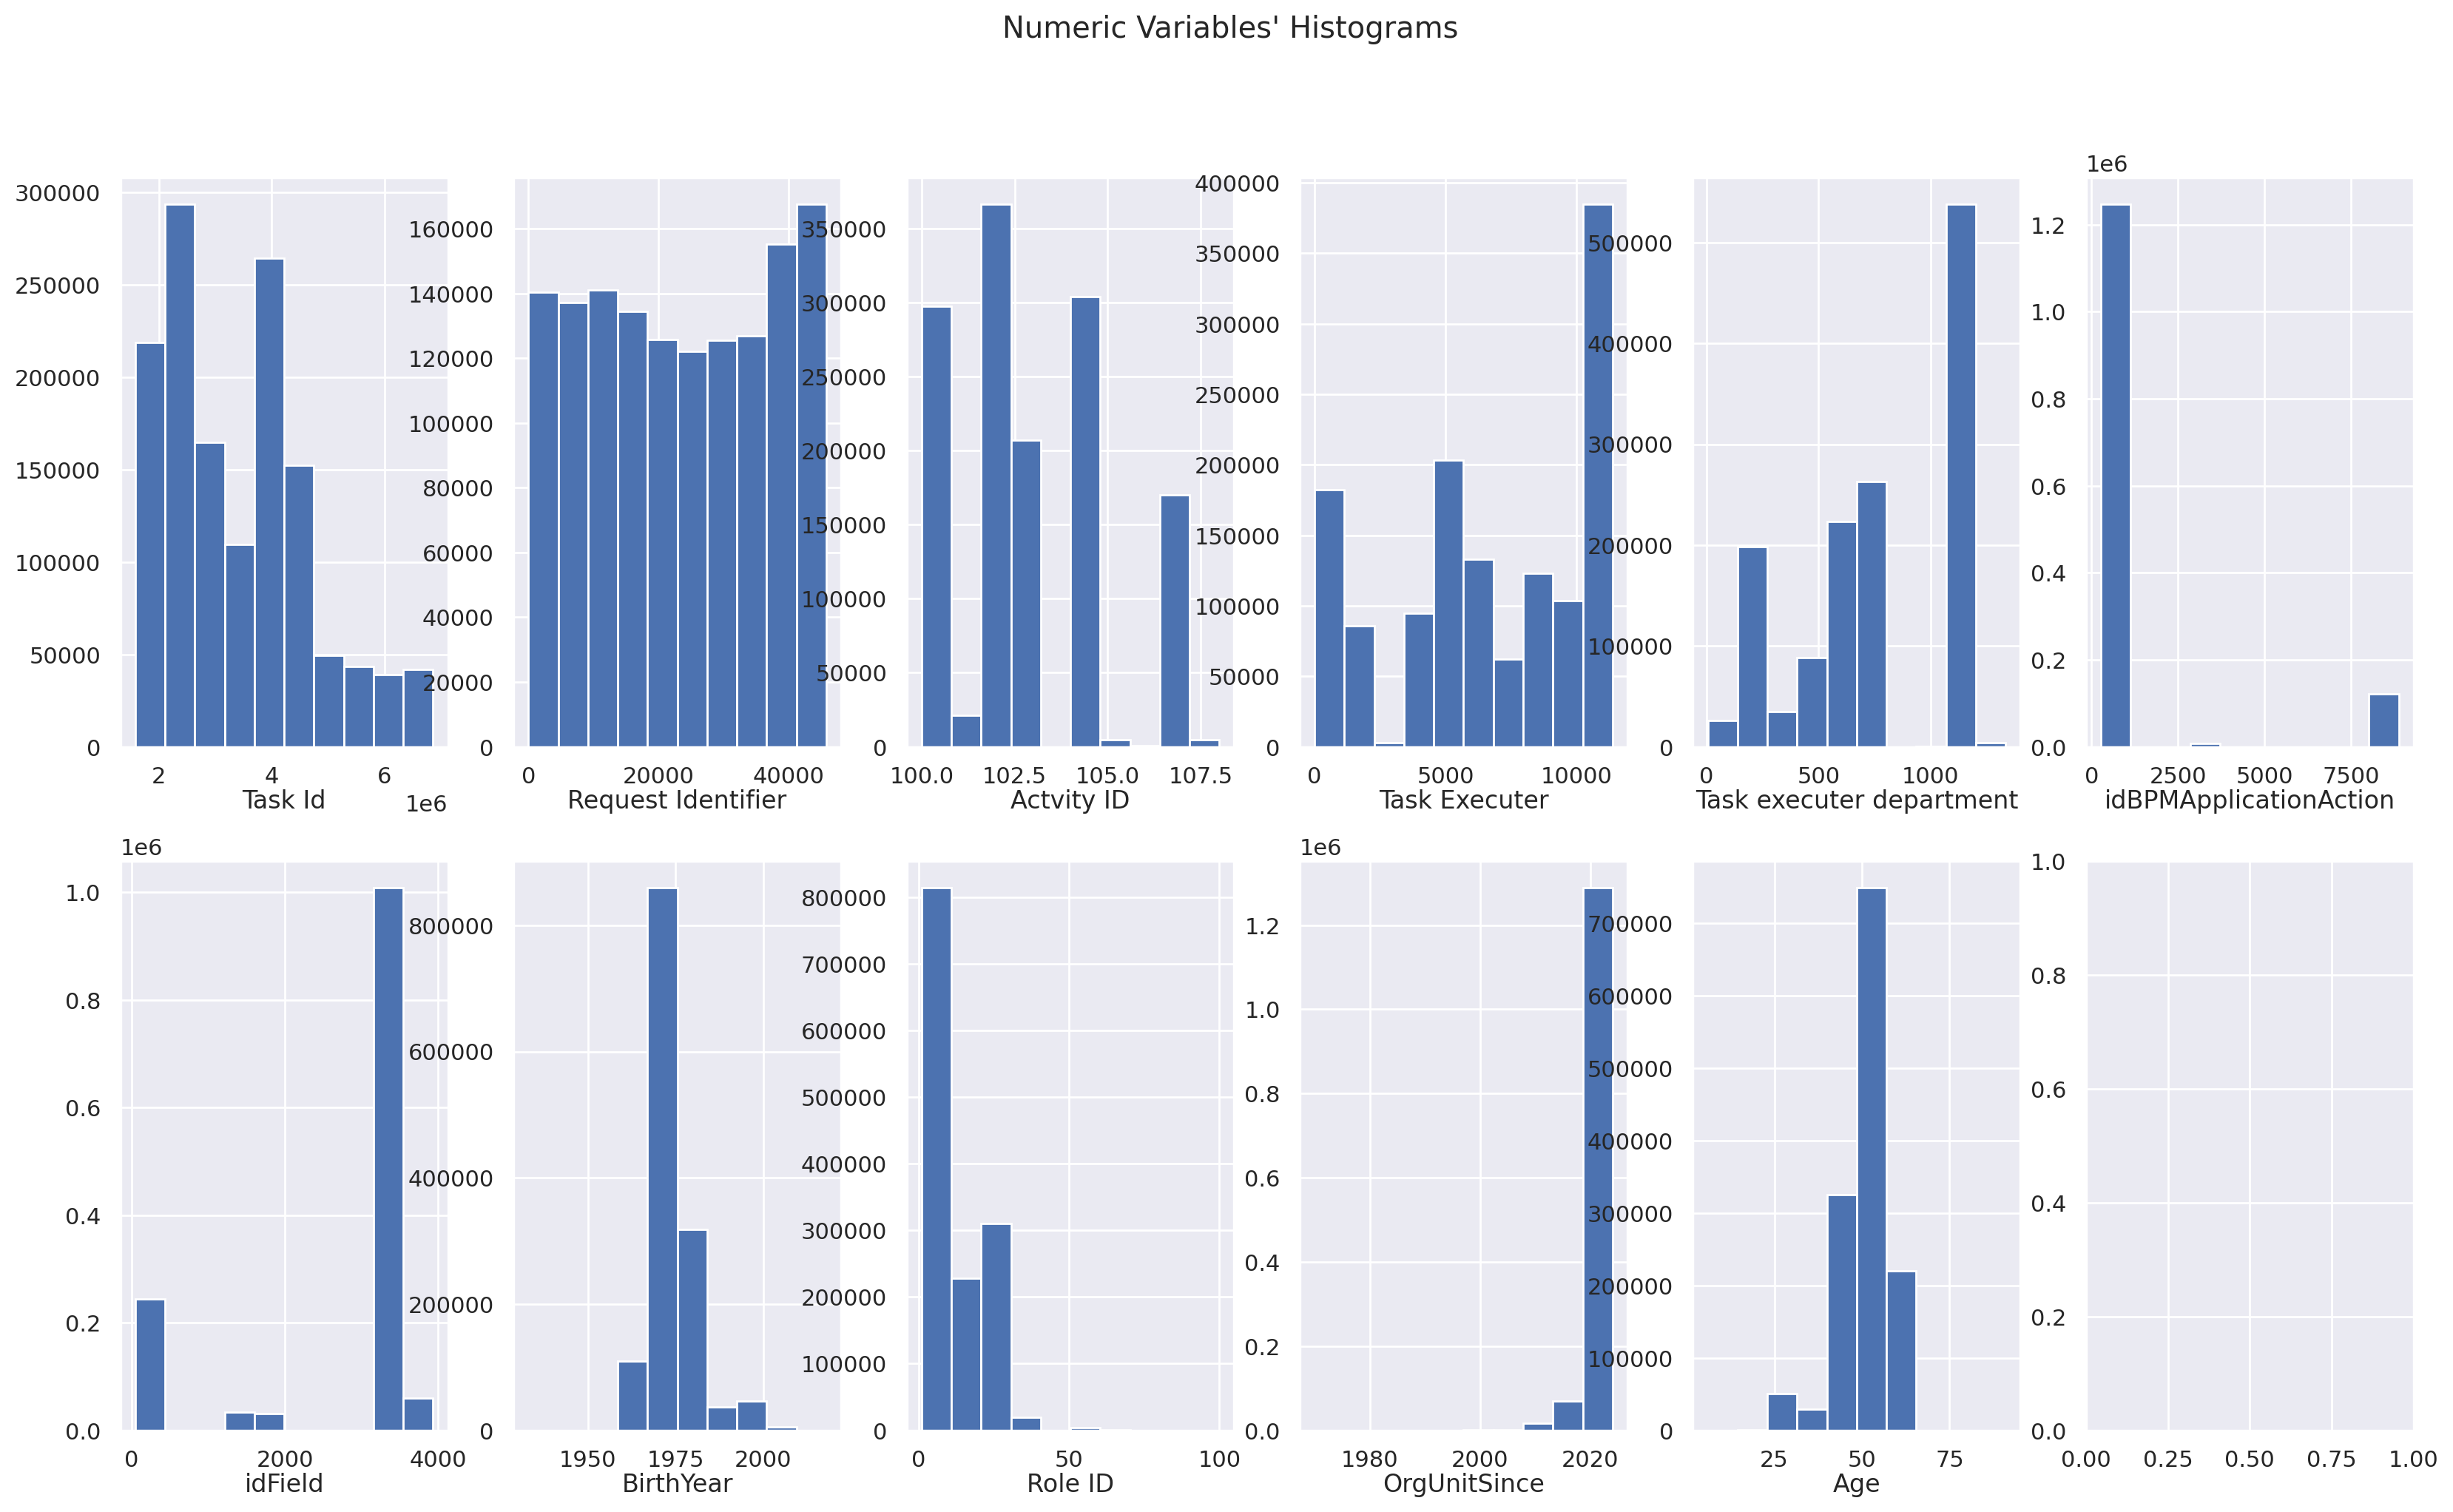

In [ ]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(numeric_cols) / 2), figsize=(20, 11))

for ax, feat in zip(axes.flatten(), numeric_cols):
    ax.hist(merged_df[feat])
    ax.set_title(feat, y=-0.13)

title = "Numeric Variables' Histograms"

plt.suptitle(title)

plt.show()

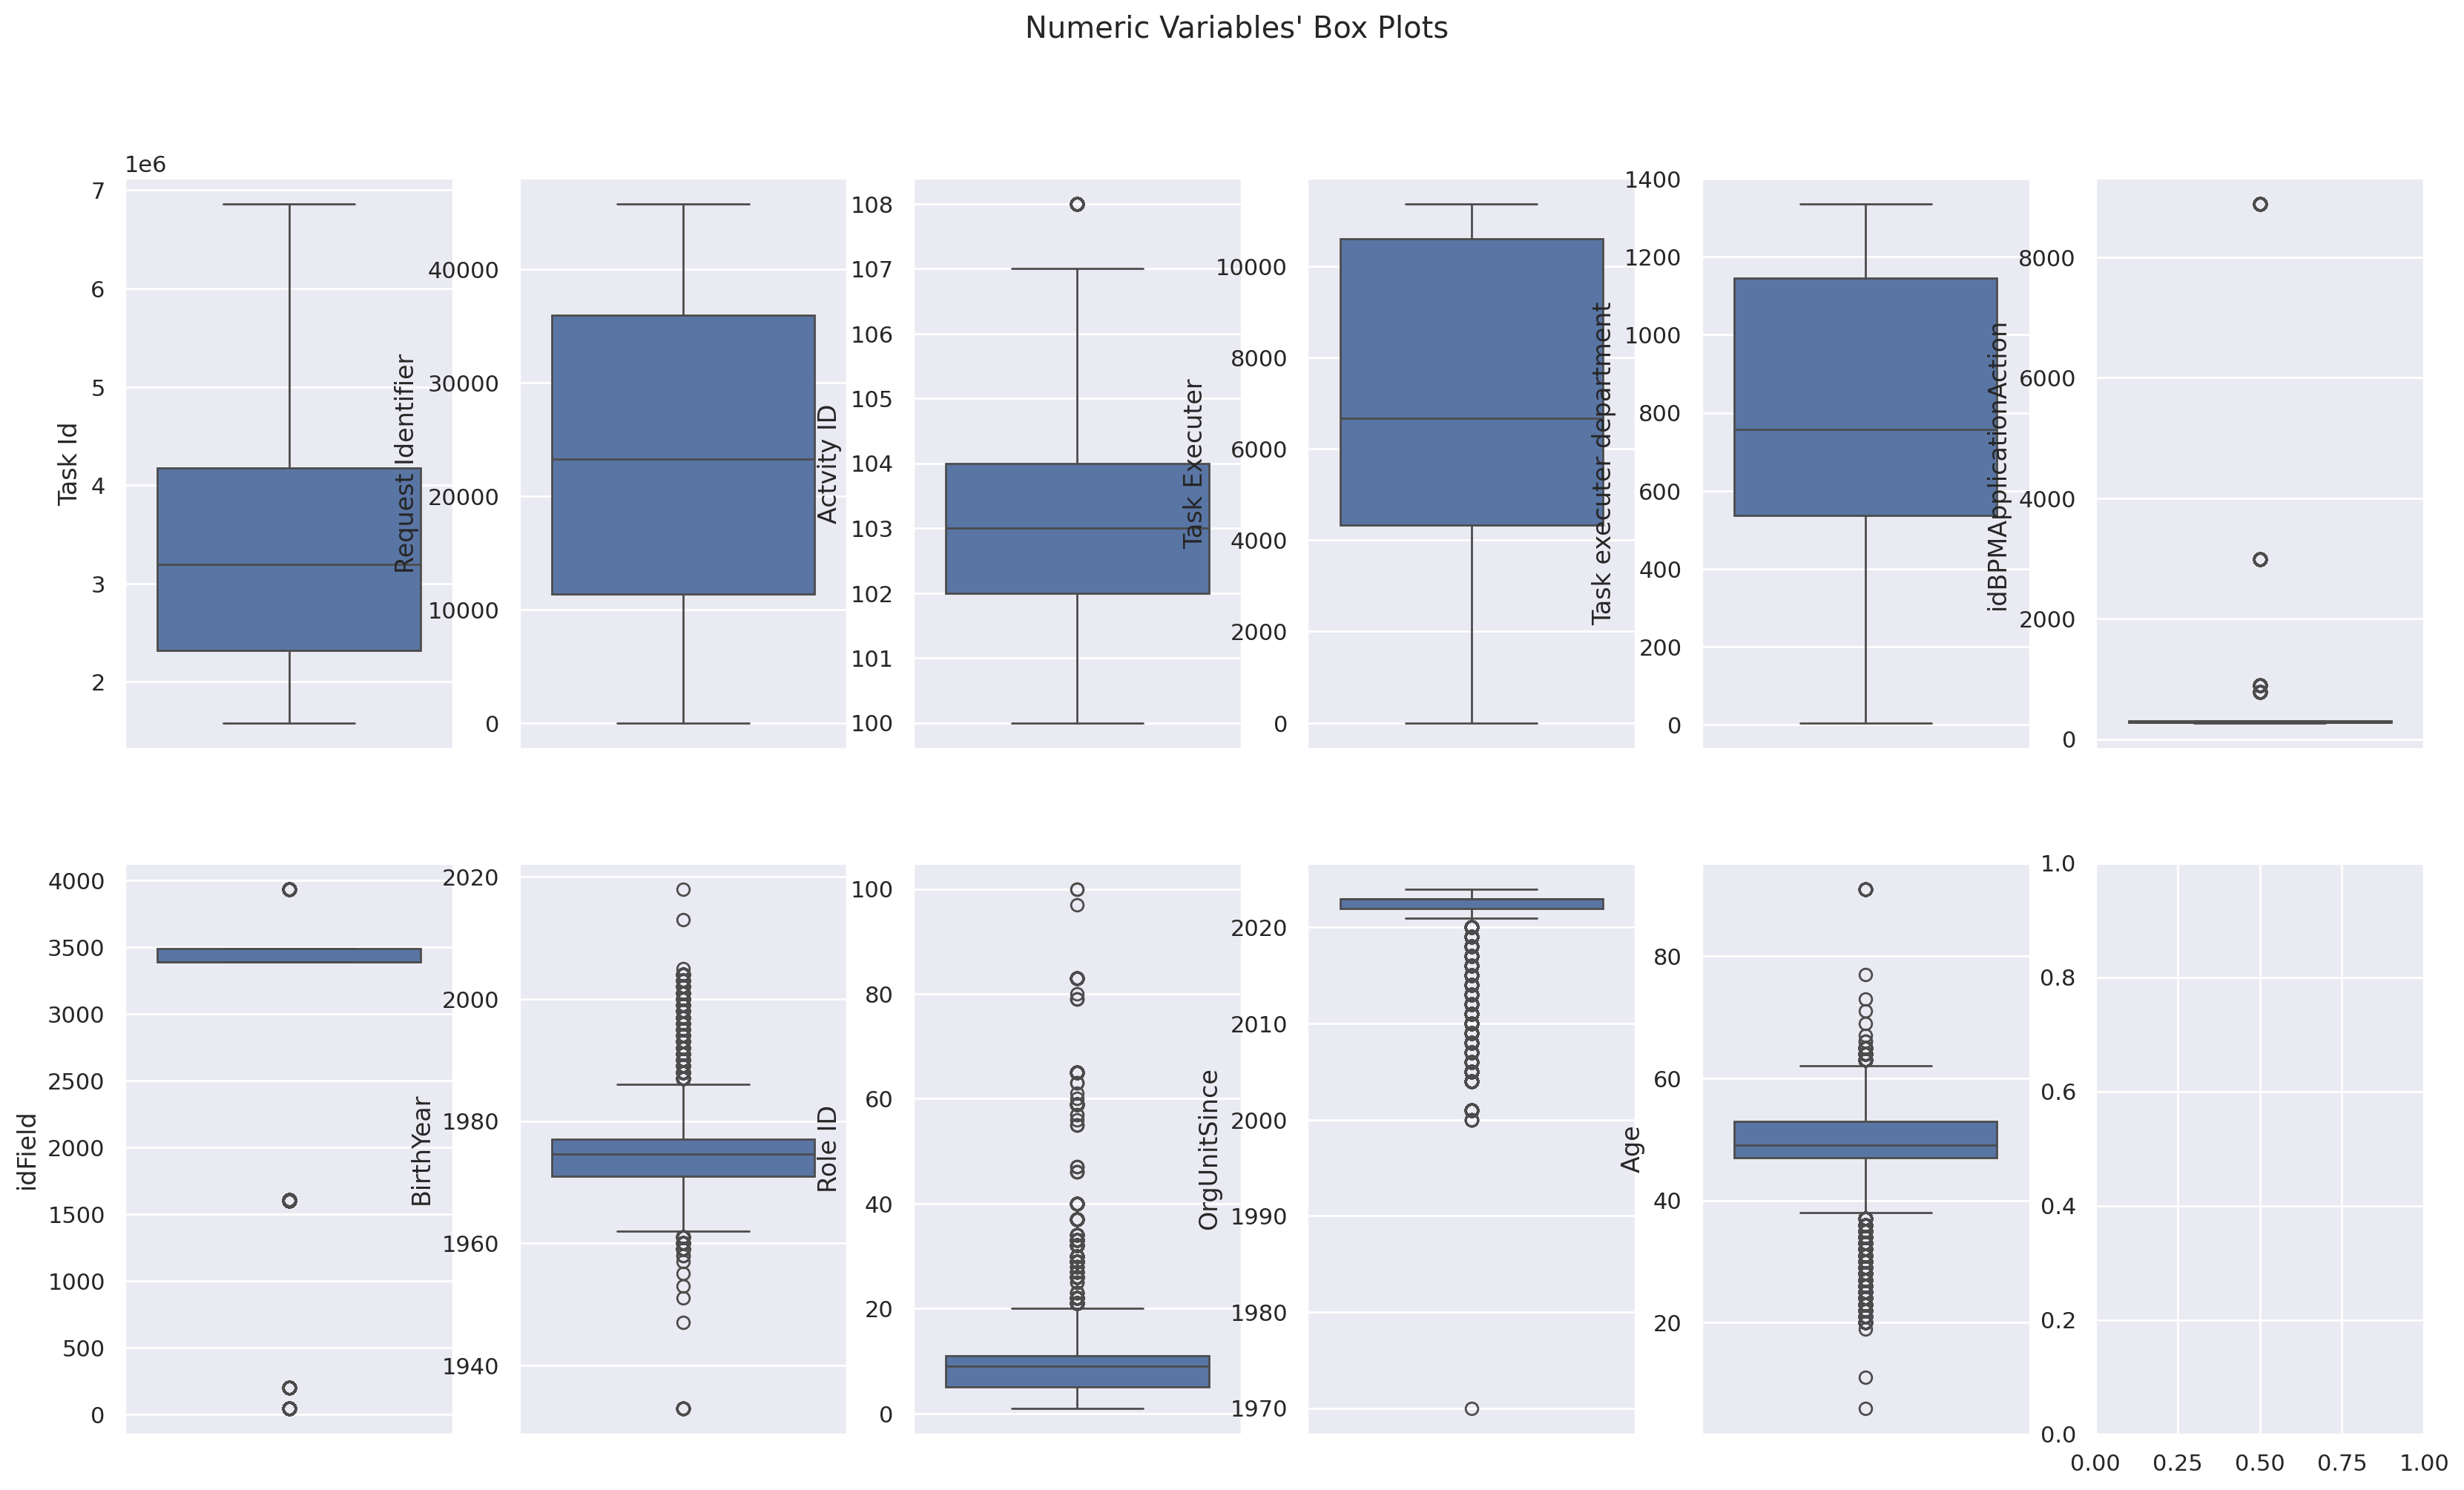

In [ ]:
sns.set()

fig, axes = plt.subplots(2, math.ceil(len(numeric_cols) / 2), figsize=(20, 11))


for ax, feat in zip(axes.flatten(), numeric_cols):
    sns.boxplot(merged_df[feat], ax=ax)

title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

##Outlier Removal

In [ ]:
# # Calculate the first quartile (Q1), third quartile (Q3), and IQR for 'idBPMApplicationAction'
# Q1 = merged_df['idBPMApplicationAction'].quantile(0.25)
# Q3 = merged_df['idBPMApplicationAction'].quantile(0.75)
# #IQR = Q3 - Q1

# # Determine the lower and upper bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Filter out the outliers
# cleaned_df = merged_df[~((merged_df['idBPMApplicationAction'] < lower_bound) | (merged_df['idBPMApplicationAction'] > upper_bound))]

# # Display the cleaned DataFrame
# print(cleaned_df)

##Feature Engineering

In [ ]:
merged_df

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,idBPMApplicationAction,idField,Value,Sex,BirthYear,Role ID,Is Manager,OrgUnitSince,IsOutSourcer,Age
0,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,Initial Request,270.0,1602.0,1,M,1967.0,5.0,Yes,2021.0,N,57.0
1,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,Initial Request,270.0,47.0,1,M,1967.0,5.0,Yes,2021.0,N,57.0
2,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,Initial Request,270.0,3486.0,10,M,1967.0,5.0,Yes,2021.0,N,57.0
3,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,Initial Request,270.0,3491.0,10,M,1967.0,5.0,Yes,2021.0,N,57.0
4,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,Initial Request,270.0,3388.0,10,M,1967.0,5.0,Yes,2021.0,N,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376080,6863412.0,45772.0,2024-05-07 08:31:29.010,2024-05-07 08:50:29.990,2024-05-07 08:50:59.667,2024-05-13 12:31:29.097,107.0,2243.0,722.0,Final task,299.0,203.0,2024-05-01T23:00:00.000Z,F,1999.0,4.0,Yes,2023.0,N,25.0
1376081,6863412.0,45772.0,2024-05-07 08:31:29.010,2024-05-07 08:50:29.990,2024-05-07 08:50:59.667,2024-05-13 12:31:29.097,107.0,2243.0,722.0,Final task,299.0,3486.0,30,F,1999.0,4.0,Yes,2023.0,N,25.0
1376082,6863412.0,45772.0,2024-05-07 08:31:29.010,2024-05-07 08:50:29.990,2024-05-07 08:50:59.667,2024-05-13 12:31:29.097,107.0,2243.0,722.0,Final task,299.0,3388.0,50,F,1999.0,4.0,Yes,2023.0,N,25.0
1376083,6863412.0,45772.0,2024-05-07 08:31:29.010,2024-05-07 08:50:29.990,2024-05-07 08:50:59.667,2024-05-13 12:31:29.097,107.0,2243.0,722.0,Final task,299.0,3390.0,50,F,1999.0,4.0,Yes,2023.0,N,25.0


In [ ]:
#Task Duration
merged_df['Task arrival date'] = pd.to_datetime(merged_df['Task arrival date'])
merged_df['Task execution end date'] = pd.to_datetime(merged_df['Task execution end date'])
merged_df['Task duration'] = (merged_df['Task execution end date'] - merged_df['Task arrival date']).dt.total_seconds()

In [ ]:
#Task Sequence
merged_df['Task sequence'] = merged_df.groupby('Request Identifier').cumcount() + 1

In [ ]:
# List of categorical columns
categorical_columns = ['Task Type', 'Role ID', 'OrgUnit', 'Is Manager', 'IsOutSourcer']

# Verify and handle missing columns
existing_columns = [col for col in categorical_columns if col in merged_df.columns]
missing_columns = [col for col in categorical_columns if col not in merged_df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")

# Categorical Encoding
label_encoders = {}
for column in existing_columns:
    le = LabelEncoder()
    merged_df[column] = le.fit_transform(merged_df[column].astype(str))
    label_encoders[column] = le

# Previous Task Information
# For simplicity, we'll shift the relevant columns to use the previous task's information
merged_df = merged_df.sort_values(by=['Request Identifier', 'Task sequence'])
merged_df['Previous Task Type'] = merged_df.groupby('Request Identifier')['Task Type'].shift(1)
merged_df['Previous Task duration'] = merged_df.groupby('Request Identifier')['Task duration'].shift(1)
merged_df['Previous Task executer'] = merged_df.groupby('Request Identifier')['Task Executer'].shift(1)

# Fill NaN values resulting from the shift
merged_df.fillna({'Previous Task Type': -1, 'Previous Task duration': 0, 'Previous Task executer': -1}, inplace=True)

# Display the first few rows of the final merged DataFrame
print(merged_df.head())


Missing columns: ['OrgUnit']
     Task Id  Request Identifier       Task arrival date  \
0  1584303.0                 1.0 2022-04-11 16:02:13.820   
1  1584303.0                 1.0 2022-04-11 16:02:13.820   
2  1584303.0                 1.0 2022-04-11 16:02:13.820   
3  1584303.0                 1.0 2022-04-11 16:02:13.820   
4  1584303.0                 1.0 2022-04-11 16:02:13.820   

         Task capture date Task execution end date  Task predicted end date  \
0  2022-04-11 16:02:13.820 2022-04-11 16:02:13.820  2023-07-06 16:43:32.387   
1  2022-04-11 16:02:13.820 2022-04-11 16:02:13.820  2023-07-06 16:43:32.387   
2  2022-04-11 16:02:13.820 2022-04-11 16:02:13.820  2023-07-06 16:43:32.387   
3  2022-04-11 16:02:13.820 2022-04-11 16:02:13.820  2023-07-06 16:43:32.387   
4  2022-04-11 16:02:13.820 2022-04-11 16:02:13.820  2023-07-06 16:43:32.387   

   Actvity ID  Task Executer  Task executer department  Task Type  ...  \
0       100.0         7638.0                     569.0       

In [ ]:
# Verify data types and handle any remaining missing values
merged_df.info()

# Ensure that all columns are appropriately typed
merged_df['Task duration'] = merged_df['Task duration'].astype(float)
merged_df['Previous Task duration'] = merged_df['Previous Task duration'].astype(float)

# Fill any remaining missing values with appropriate defaults
merged_df.fillna(0, inplace=True)

# Display the final structure of the DataFrame
print(merged_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1376085 entries, 0 to 1376084
Data columns (total 25 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   Task Id                   1376085 non-null  float64       
 1   Request Identifier        1376085 non-null  float64       
 2   Task arrival date         1376085 non-null  datetime64[ns]
 3   Task capture date         1376085 non-null  object        
 4   Task execution end date   1376085 non-null  datetime64[ns]
 5   Task predicted end date   1376085 non-null  object        
 6   Actvity ID                1376085 non-null  float64       
 7   Task Executer             1376085 non-null  float64       
 8   Task executer department  1376085 non-null  float64       
 9   Task Type                 1376085 non-null  int64         
 10  idBPMApplicationAction    1376085 non-null  float64       
 11  idField                   1376085 non-null  float64    

###Dummy Variables (Encoding - OneHotEncoder)

In [ ]:
merged_df

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,Role ID,Is Manager,OrgUnitSince,IsOutSourcer,Age,Task duration,Task sequence,Previous Task Type,Previous Task duration,Previous Task executer
0,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,2,...,33,1,2021.0,0,57.0,0.000,1,-1.0,0.000,-1.0
1,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,2,...,33,1,2021.0,0,57.0,0.000,2,2.0,0.000,7638.0
2,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,2,...,33,1,2021.0,0,57.0,0.000,3,2.0,0.000,7638.0
3,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,2,...,33,1,2021.0,0,57.0,0.000,4,2.0,0.000,7638.0
4,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,2,...,33,1,2021.0,0,57.0,0.000,5,2.0,0.000,7638.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1376080,6863412.0,45772.0,2024-05-07 08:31:29.010,2024-05-07 08:50:29.990,2024-05-07 08:50:59.667,2024-05-13 12:31:29.097,107.0,2243.0,722.0,1,...,29,1,2023.0,0,25.0,1170.657,50,1.0,1170.657,2243.0
1376081,6863412.0,45772.0,2024-05-07 08:31:29.010,2024-05-07 08:50:29.990,2024-05-07 08:50:59.667,2024-05-13 12:31:29.097,107.0,2243.0,722.0,1,...,29,1,2023.0,0,25.0,1170.657,51,1.0,1170.657,2243.0
1376082,6863412.0,45772.0,2024-05-07 08:31:29.010,2024-05-07 08:50:29.990,2024-05-07 08:50:59.667,2024-05-13 12:31:29.097,107.0,2243.0,722.0,1,...,29,1,2023.0,0,25.0,1170.657,52,1.0,1170.657,2243.0
1376083,6863412.0,45772.0,2024-05-07 08:31:29.010,2024-05-07 08:50:29.990,2024-05-07 08:50:59.667,2024-05-13 12:31:29.097,107.0,2243.0,722.0,1,...,29,1,2023.0,0,25.0,1170.657,53,1.0,1170.657,2243.0


In [ ]:
merged_df['Task arrival date'].value_counts(), merged_df['Task capture date'].value_counts(), merged_df['Task execution end date'].value_counts(), merged_df['Task predicted end date'].value_counts(), merged_df['Task Type'].value_counts(), merged_df['Value'].value_counts(), merged_df['Sex'].value_counts(), merged_df['Is Manager'].value_counts(), merged_df['IsOutSourcer'].value_counts()

(Task arrival date
 2023-10-16 16:42:00.000    318
 2022-05-06 17:31:46.897     42
 2022-05-05 12:13:12.187     36
 2023-12-26 08:58:41.810     18
 2023-12-26 17:30:06.663     18
                           ... 
 2024-02-22 12:13:44.350      4
 2024-02-21 09:53:38.003      4
 2024-02-21 09:53:38.630      4
 2024-02-21 10:05:59.880      4
 2024-02-21 09:43:26.393      4
 Name: count, Length: 208936, dtype: int64,
 Task capture date
 2023-12-06 10:58:00.000    24693
 2023-09-22 14:48:00.000    15548
 2023-10-16 16:42:00.000      318
 2022-05-18 12:13:54.347       42
 2022-05-12 14:26:38.930       36
                            ...  
 2023-07-19 11:11:25.327        4
 2023-07-03 10:17:54.737        4
 2023-07-03 10:20:06.847        4
 2023-07-03 14:24:41.537        4
 2023-06-28 11:51:53.727        4
 Name: count, Length: 202364, dtype: int64,
 Task execution end date
 2023-12-06 10:58:00.000    63861
 2023-09-22 14:48:00.000    57979
 2023-10-16 16:42:00.000      318
 2022-05-18 13:05:00.

In [ ]:
# Perform the encoding with One-Hot-Encoder in the train dataset
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(merged_df[['Sex', 'Is Manager', 'IsOutSourcer']])
ohc_feat_names = ohc.get_feature_names_out(['Sex', 'Is Manager', 'IsOutSourcer'])
ohc_df = pd.DataFrame(ohc_feat, index=merged_df.index, columns=ohc_feat_names)

# Display the one-hot encoded DataFrame
print(ohc_df)

         Sex_M  Is Manager_1  IsOutSourcer_1
0          1.0           1.0             0.0
1          1.0           1.0             0.0
2          1.0           1.0             0.0
3          1.0           1.0             0.0
4          1.0           1.0             0.0
...        ...           ...             ...
1376080    0.0           1.0             0.0
1376081    0.0           1.0             0.0
1376082    0.0           1.0             0.0
1376083    0.0           1.0             0.0
1376084    0.0           1.0             0.0

[1376085 rows x 3 columns]


In [ ]:
df_final = ohc_df

# Drop the original columns from merged_df and concatenate the encoded DataFrame
df_final = pd.concat([merged_df.drop(columns=['Sex', 'Is Manager', 'IsOutSourcer']), ohc_df], axis=1)

# Display the final DataFrame
df_final.head()

,Task Id,Request Identifier,Task arrival date,Task capture date,Task execution end date,Task predicted end date,Actvity ID,Task Executer,Task executer department,Task Type,...,OrgUnitSince,Age,Task duration,Task sequence,Previous Task Type,Previous Task duration,Previous Task executer,Sex_M,Is Manager_1,IsOutSourcer_1
0,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,2,...,2021.0,57.0,0.0,1,-1.0,0.0,-1.0,1.0,1.0,0.0
1,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,2,...,2021.0,57.0,0.0,2,2.0,0.0,7638.0,1.0,1.0,0.0
2,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,2,...,2021.0,57.0,0.0,3,2.0,0.0,7638.0,1.0,1.0,0.0
3,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,2,...,2021.0,57.0,0.0,4,2.0,0.0,7638.0,1.0,1.0,0.0
4,1584303.0,1.0,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2022-04-11 16:02:13.820,2023-07-06 16:43:32.387,100.0,7638.0,569.0,2,...,2021.0,57.0,0.0,5,2.0,0.0,7638.0,1.0,1.0,0.0


###Finalising Feature Engineering and Selection

In [ ]:
merged_df = df_final

In [ ]:
# List of categorical columns
categorical_columns = ['Task Type', 'Role ID', 'OrgUnit', 'Is Manager', 'IsOutSourcer', 'Sex']

# Verify and handle missing columns
existing_columns = [col for col in categorical_columns if col in merged_df.columns]
missing_columns = [col for col in categorical_columns if col not in merged_df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")

# Categorical Encoding
label_encoders = {}
for column in existing_columns:
    le = LabelEncoder()
    merged_df[column] = le.fit_transform(merged_df[column].astype(str))
    label_encoders[column] = le

# Ensure datetime columns are correctly formatted
datetime_columns = ['Task arrival date', 'Task capture date', 'Task execution end date', 'Task predicted end date']

def preprocess_datetime_columns(df, datetime_columns):
    for col in datetime_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
            df[f'{col}_year'] = df[col].dt.year
            df[f'{col}_month'] = df[col].dt.month
            df[f'{col}_day'] = df[col].dt.day
            df[f'{col}_hour'] = df[col].dt.hour
            df[f'{col}_minute'] = df[col].dt.minute
            # Drop the original datetime column
            df.drop(col, axis=1, inplace=True)
    return df

# Apply the preprocessing function to the merged_df
merged_df = preprocess_datetime_columns(merged_df, datetime_columns)

# Ensure that all columns are appropriately typed
merged_df['Task duration'] = merged_df['Task duration'].astype(float)
merged_df['Previous Task duration'] = merged_df['Previous Task duration'].astype(float)

# Fill any remaining missing values with appropriate defaults
merged_df.fillna(0, inplace=True)

# Display the final structure of the DataFrame to verify changes
print(merged_df.head())


Missing columns: ['OrgUnit', 'Is Manager', 'IsOutSourcer', 'Sex']
     Task Id  Request Identifier  Actvity ID  Task Executer  \
0  1584303.0                 1.0       100.0         7638.0   
1  1584303.0                 1.0       100.0         7638.0   
2  1584303.0                 1.0       100.0         7638.0   
3  1584303.0                 1.0       100.0         7638.0   
4  1584303.0                 1.0       100.0         7638.0   

   Task executer department  Task Type  idBPMApplicationAction  idField Value  \
0                     569.0          2                   270.0   1602.0     1   
1                     569.0          2                   270.0     47.0     1   
2                     569.0          2                   270.0   3486.0    10   
3                     569.0          2                   270.0   3491.0    10   
4                     569.0          2                   270.0   3388.0    10   

   BirthYear  ...  Task execution end date_year  \
0     1967.0  ...

In [ ]:
# Split data for Task 102 and Task 105
task_102_df = merged_df[merged_df['Actvity ID'] == 102]
task_105_df = merged_df[merged_df['Actvity ID'] == 105]

# Check the distribution of the target variable for Task 102 and Task 105
print("Distribution of target variable for Task 102:")
print(task_102_df['idBPMApplicationAction'].value_counts())

print("Distribution of target variable for Task 105:")
print(task_105_df['idBPMApplicationAction'].value_counts())

Distribution of target variable for Task 102:
idBPMApplicationAction
273.0     201998
275.0      90512
290.0      47525
271.0      19672
274.0       4495
301.0       1301
298.0        637
270.0          7
8888.0         7
888.0          6
Name: count, dtype: int64
Distribution of target variable for Task 105:
idBPMApplicationAction
282.0    3368
271.0     637
273.0     620
298.0      13
290.0       4
Name: count, dtype: int64


Feature importance for Task 102


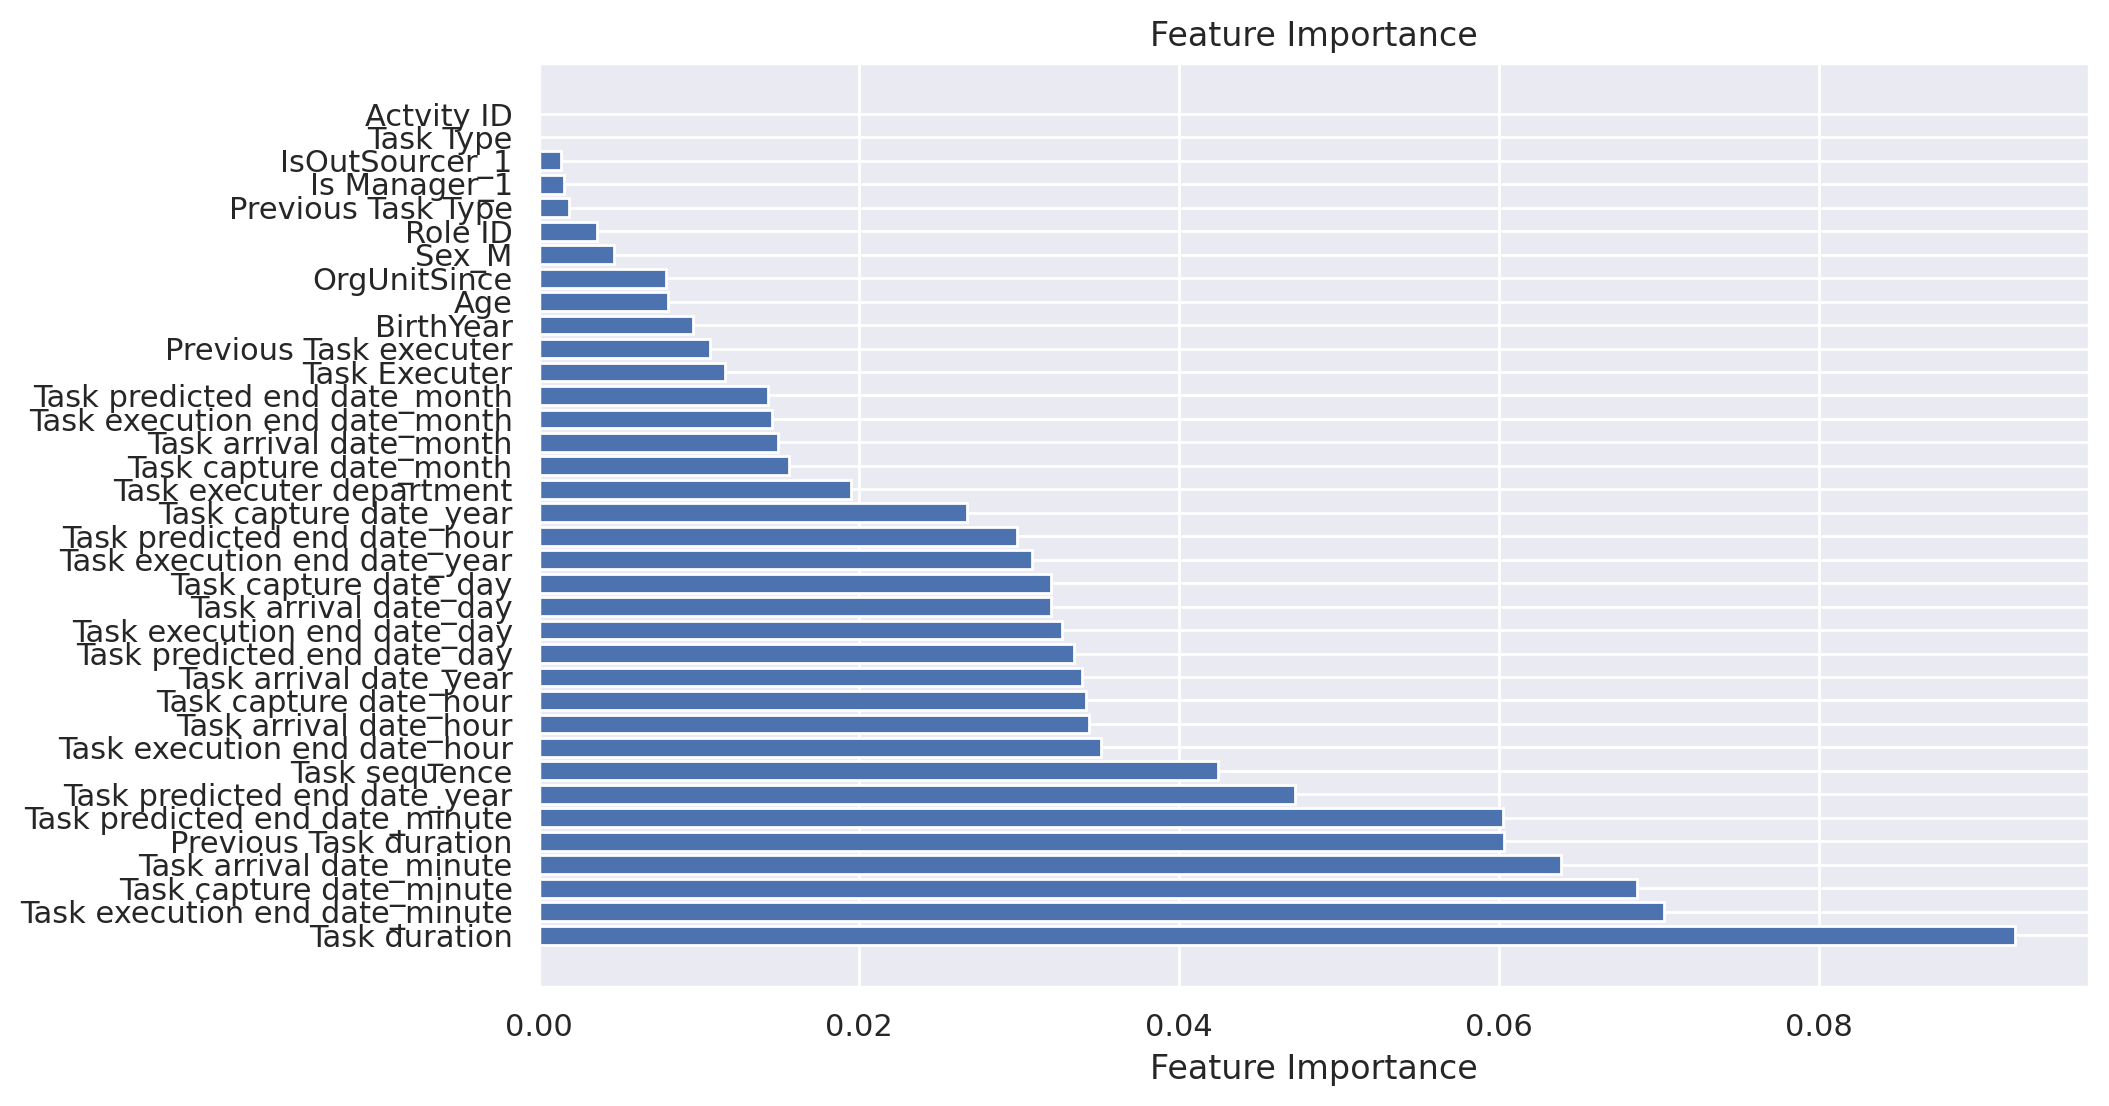

Feature importance for Task 105


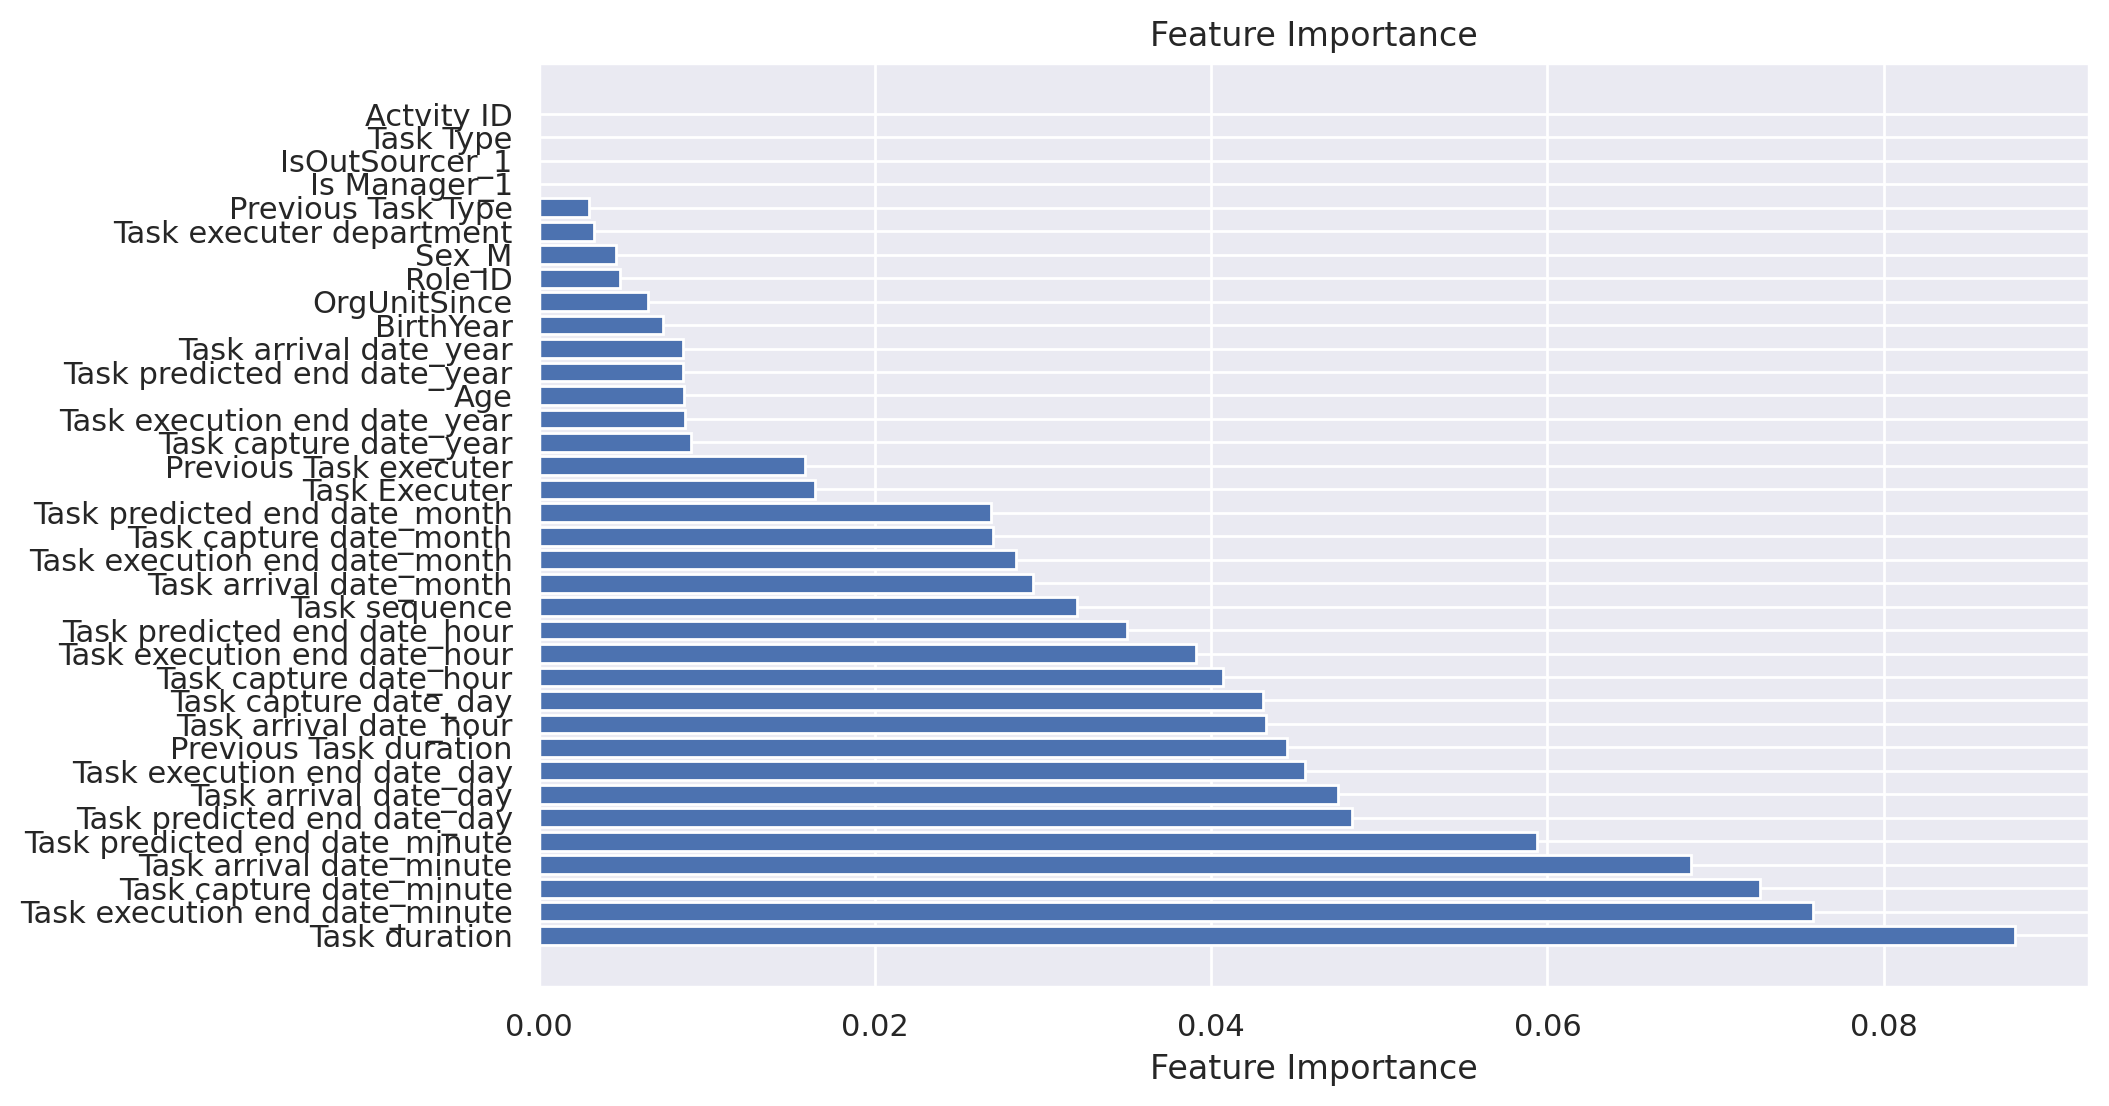

In [ ]:
def plot_feature_importance(model, X):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    names = [X.columns[i] for i in indices]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.barh(range(X.shape[1]), importance[indices], align="center")
    plt.yticks(range(X.shape[1]), names)
    plt.xlabel("Feature Importance")
    plt.show()

# Train models to get feature importances
print("Feature importance for Task 102")
X_102 = task_102_df.drop(['idBPMApplicationAction', 'Task Id', 'Request Identifier', 'idField', 'Value'], axis=1)
y_102 = task_102_df['idBPMApplicationAction']
task_102_model = RandomForestClassifier(n_estimators=100, random_state=42)
task_102_model.fit(X_102, y_102)
plot_feature_importance(task_102_model, X_102)

print("Feature importance for Task 105")
X_105 = task_105_df.drop(['idBPMApplicationAction', 'Task Id', 'Request Identifier', 'idField', 'Value'], axis=1)
y_105 = task_105_df['idBPMApplicationAction']
task_105_model = RandomForestClassifier(n_estimators=100, random_state=42)
task_105_model.fit(X_105, y_105)
plot_feature_importance(task_105_model, X_105)

Feature importance for Task 102


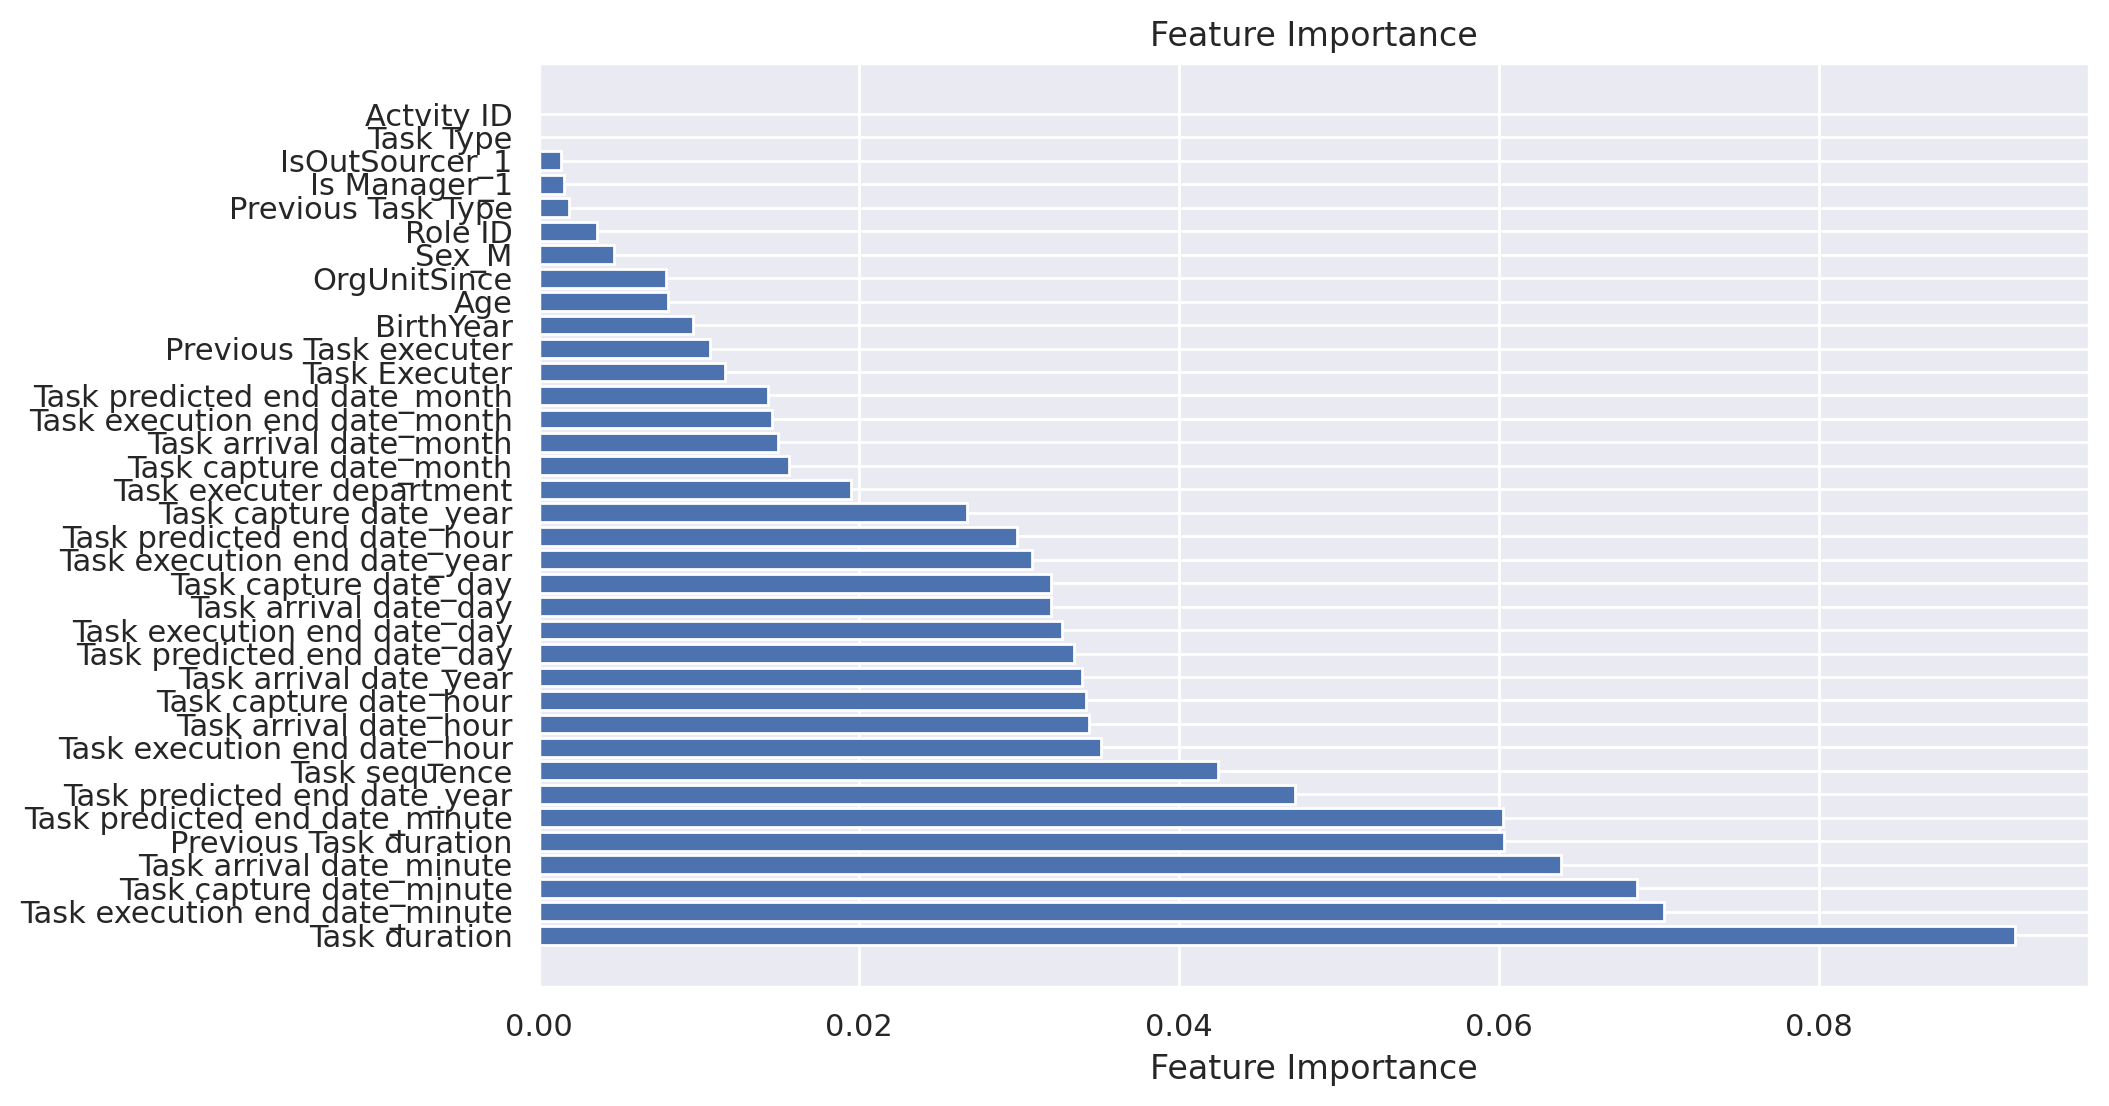

                           Feature  Importance
0                    Task duration    0.092250
1   Task execution end date_minute    0.070323
2         Task capture date_minute    0.068597
3         Task arrival date_minute    0.063830
4           Previous Task duration    0.060315
5   Task predicted end date_minute    0.060204
6     Task predicted end date_year    0.047209
7                    Task sequence    0.042446
8     Task execution end date_hour    0.035123
9           Task arrival date_hour    0.034344
10          Task capture date_hour    0.034190
11          Task arrival date_year    0.033910
12     Task predicted end date_day    0.033451
13     Task execution end date_day    0.032664
14           Task arrival date_day    0.032001
15           Task capture date_day    0.031977
16    Task execution end date_year    0.030801
17    Task predicted end date_hour    0.029838
18          Task capture date_year    0.026714
19        Task executer department    0.019494
20         Ta

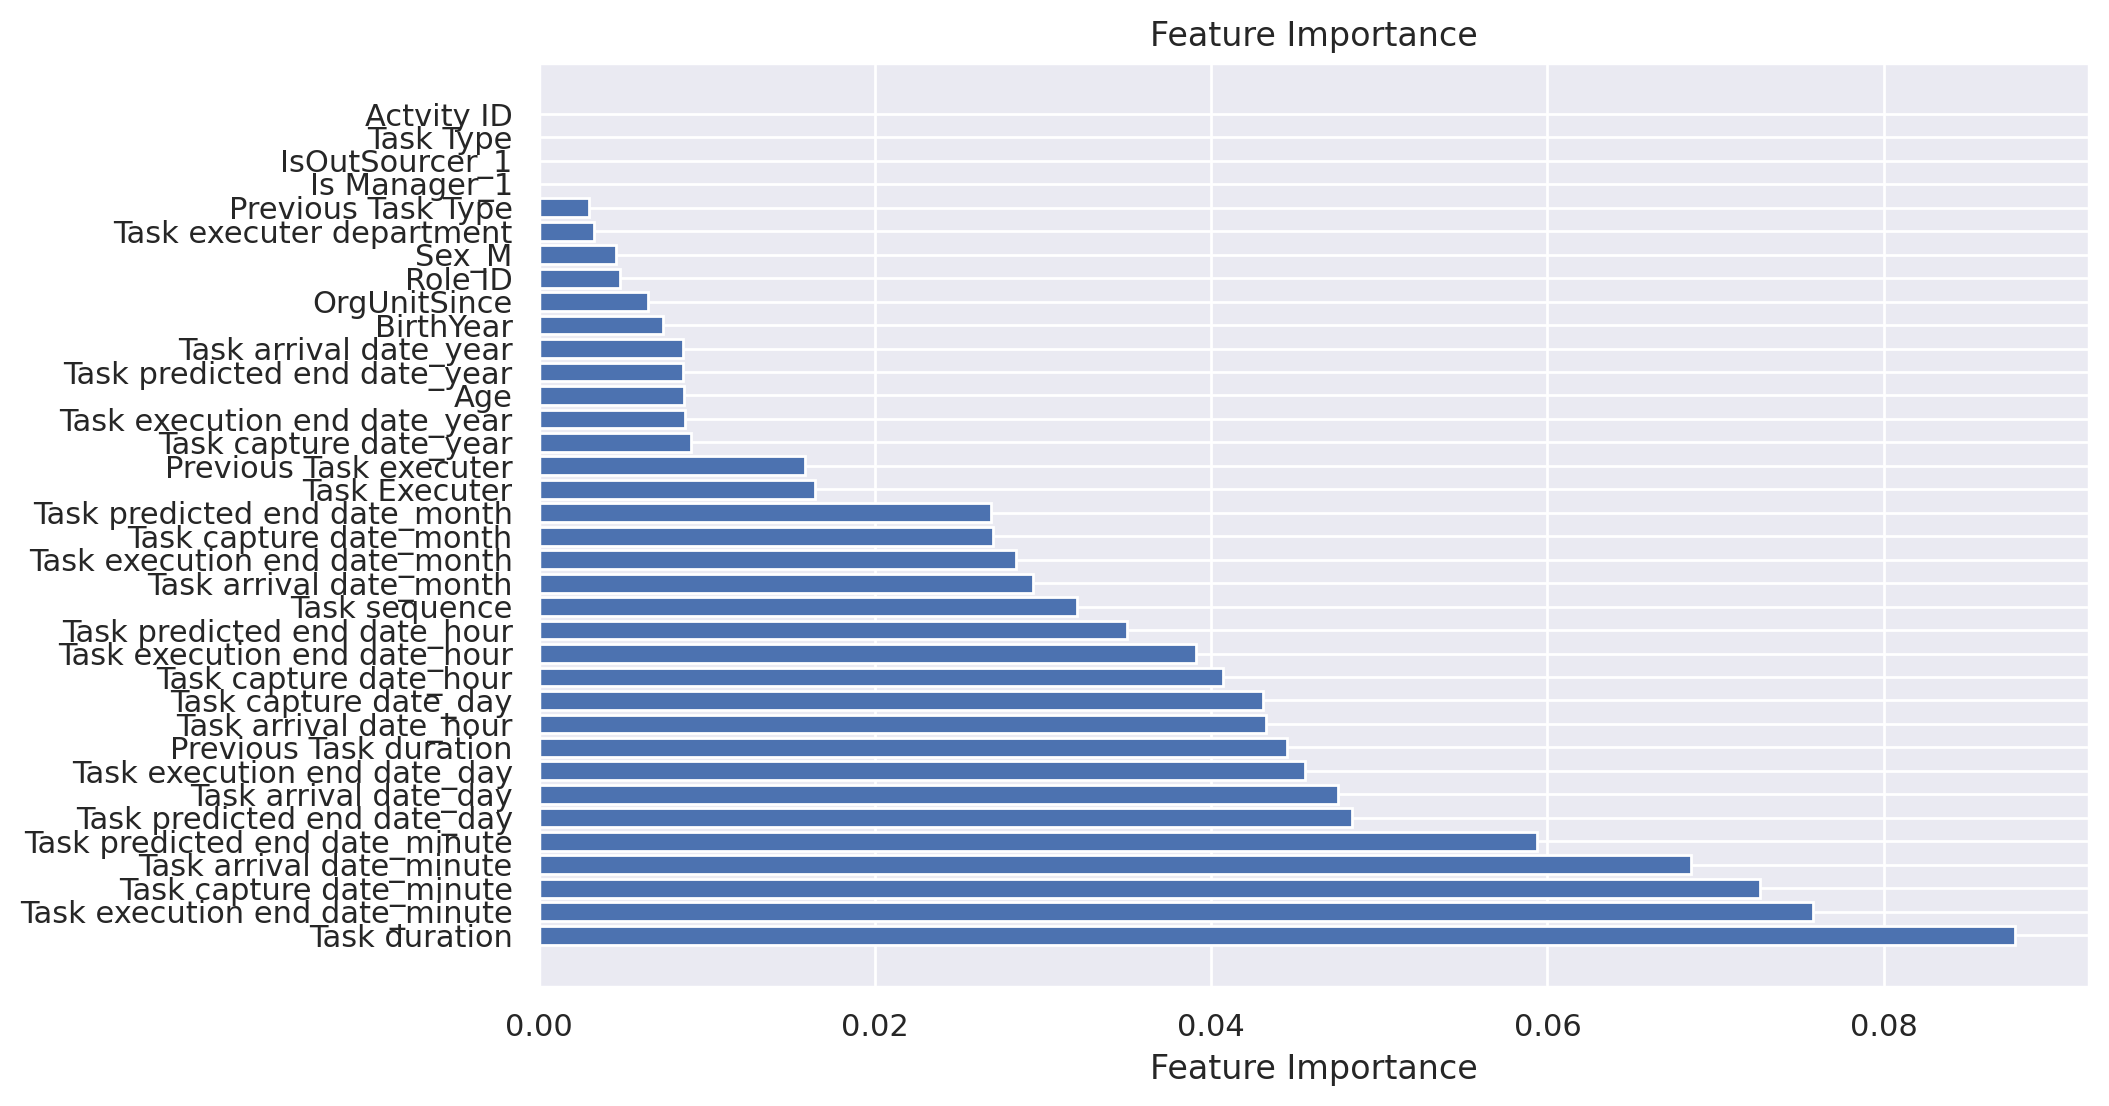

                           Feature  Importance
0                    Task duration    0.087843
1   Task execution end date_minute    0.075799
2         Task capture date_minute    0.072642
3         Task arrival date_minute    0.068535
4   Task predicted end date_minute    0.059361
5      Task predicted end date_day    0.048356
6            Task arrival date_day    0.047520
7      Task execution end date_day    0.045562
8           Previous Task duration    0.044492
9           Task arrival date_hour    0.043248
10           Task capture date_day    0.043084
11          Task capture date_hour    0.040724
12    Task execution end date_hour    0.039112
13    Task predicted end date_hour    0.034955
14                   Task sequence    0.032002
15         Task arrival date_month    0.029393
16   Task execution end date_month    0.028348
17         Task capture date_month    0.026988
18   Task predicted end date_month    0.026903
19                   Task Executer    0.016404
20          P

In [ ]:
def get_feature_importance(model, X):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    feature_importance = pd.DataFrame({
        'Feature': [X.columns[i] for i in indices],
        'Importance': importance[indices]
    })
    return feature_importance

def plot_feature_importance(model, X):
    feature_importance = get_feature_importance(model, X)
    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.barh(range(len(feature_importance)), feature_importance['Importance'], align="center")
    plt.yticks(range(len(feature_importance)), feature_importance['Feature'])
    plt.xlabel("Feature Importance")
    plt.show()
    return feature_importance

# Train models to get feature importances for Task 102
print("Feature importance for Task 102")
X_102 = task_102_df.drop(['idBPMApplicationAction', 'Task Id', 'Request Identifier', 'idField', 'Value'], axis=1)
y_102 = task_102_df['idBPMApplicationAction']
task_102_model = RandomForestClassifier(n_estimators=100, random_state=42)
task_102_model.fit(X_102, y_102)
feature_importance_102 = plot_feature_importance(task_102_model, X_102)
print(feature_importance_102)

# Calculate the threshold to remove the bottom 10% features
threshold_102 = feature_importance_102['Importance'].quantile(0.1)

# Remove features below the threshold
important_features_102 = feature_importance_102[feature_importance_102['Importance'] > threshold_102]['Feature']
X_102_reduced = X_102[important_features_102]

# Train models to get feature importances for Task 105
print("Feature importance for Task 105")
X_105 = task_105_df.drop(['idBPMApplicationAction', 'Task Id', 'Request Identifier', 'idField', 'Value'], axis=1)
y_105 = task_105_df['idBPMApplicationAction']
task_105_model = RandomForestClassifier(n_estimators=100, random_state=42)
task_105_model.fit(X_105, y_105)
feature_importance_105 = plot_feature_importance(task_105_model, X_105)
print(feature_importance_105)

# Calculate the threshold to remove the bottom 10% features
threshold_105 = feature_importance_105['Importance'].quantile(0.1)

# Remove features below the threshold
important_features_105 = feature_importance_105[feature_importance_105['Importance'] > threshold_105]['Feature']
X_105_reduced = X_105[important_features_105]


In [ ]:
X_102_reduced, X_105_reduced

(         Task duration  Task execution end date_minute  \
 9            64839.944                               2   
 10           64839.944                               2   
 11           64839.944                               2   
 12           64839.944                               2   
 13           64839.944                               2   
 ...                ...                             ...   
 1376044       4148.287                              42   
 1376045       4148.287                              42   
 1376046       4148.287                              42   
 1376047       4148.287                              42   
 1376048       4148.287                              42   
 
          Task capture date_minute  Task arrival date_minute  \
 9                              29                         2   
 10                             29                         2   
 11                             29                         2   
 12                             29

## More Data Exploration

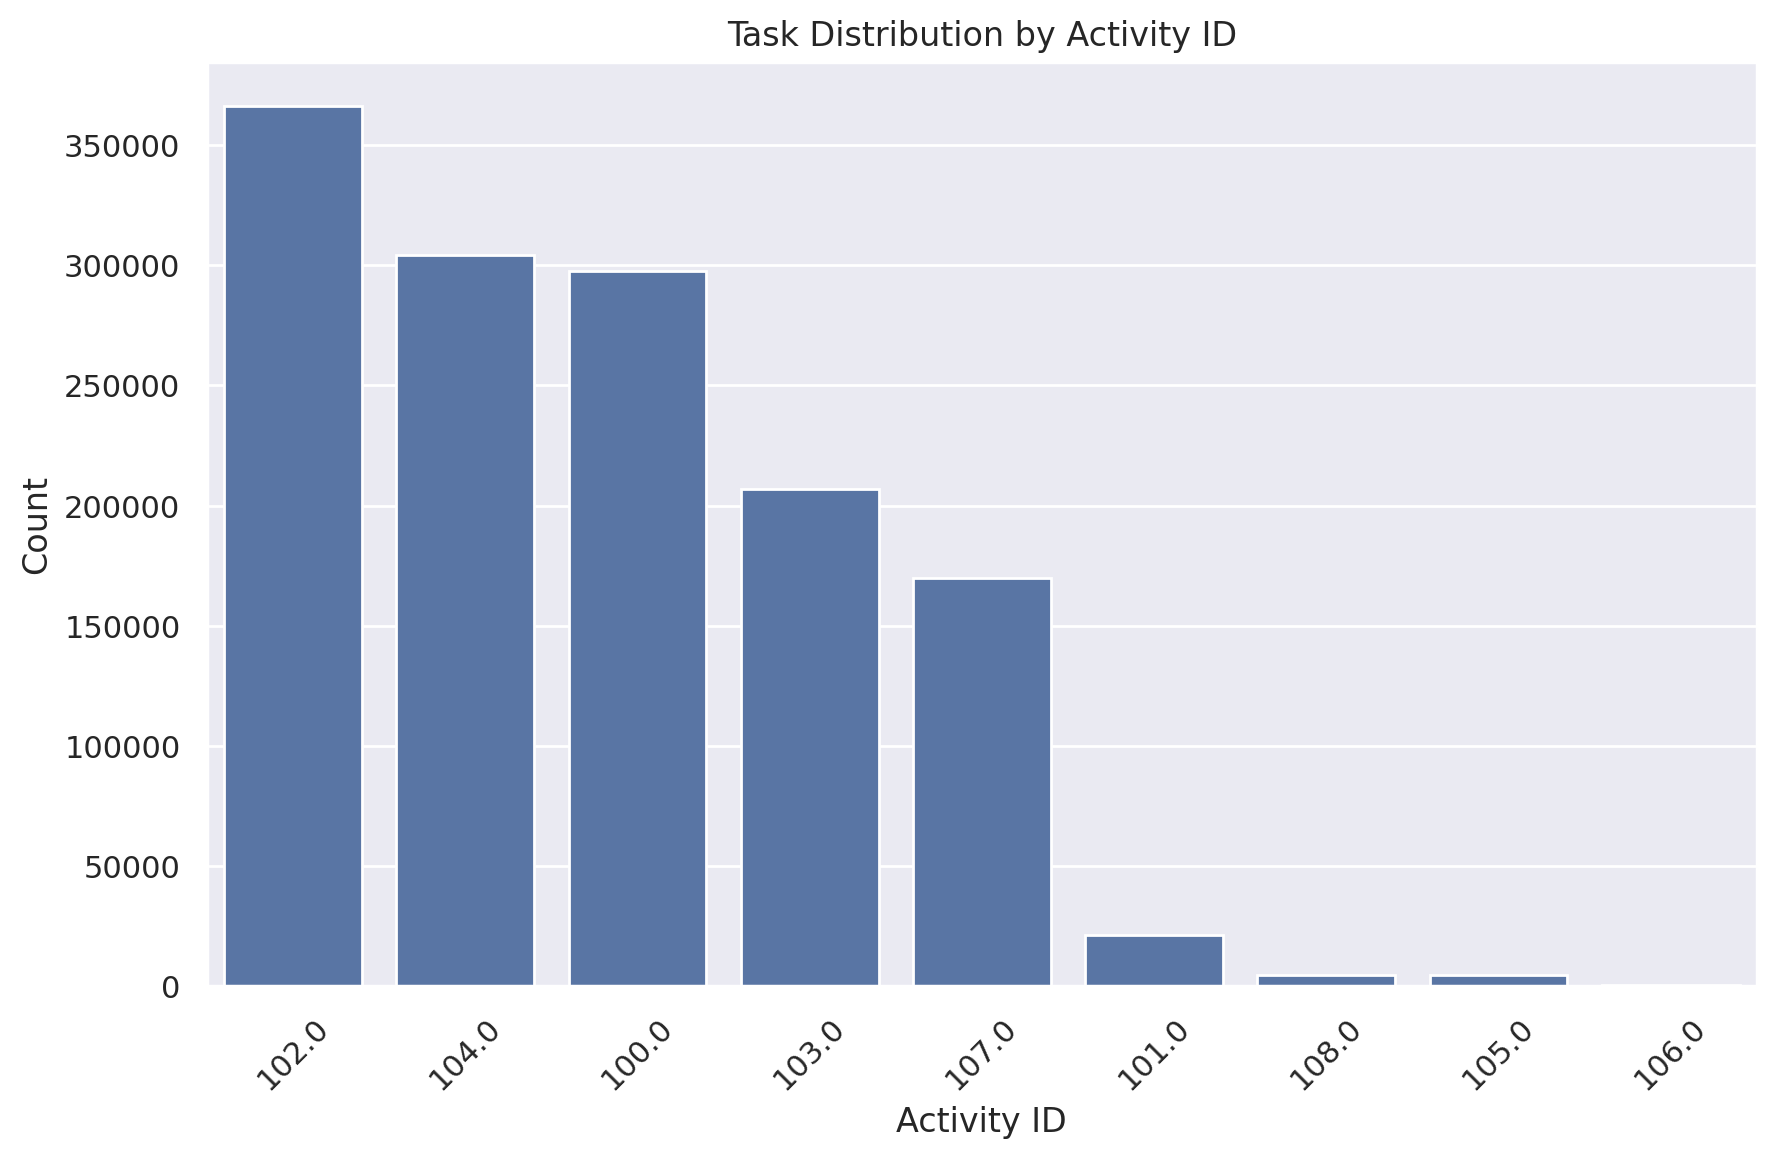

In [ ]:
#Task Distribution by Activity ID
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Actvity ID', order=merged_df['Actvity ID'].value_counts().index)
plt.title('Task Distribution by Activity ID')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

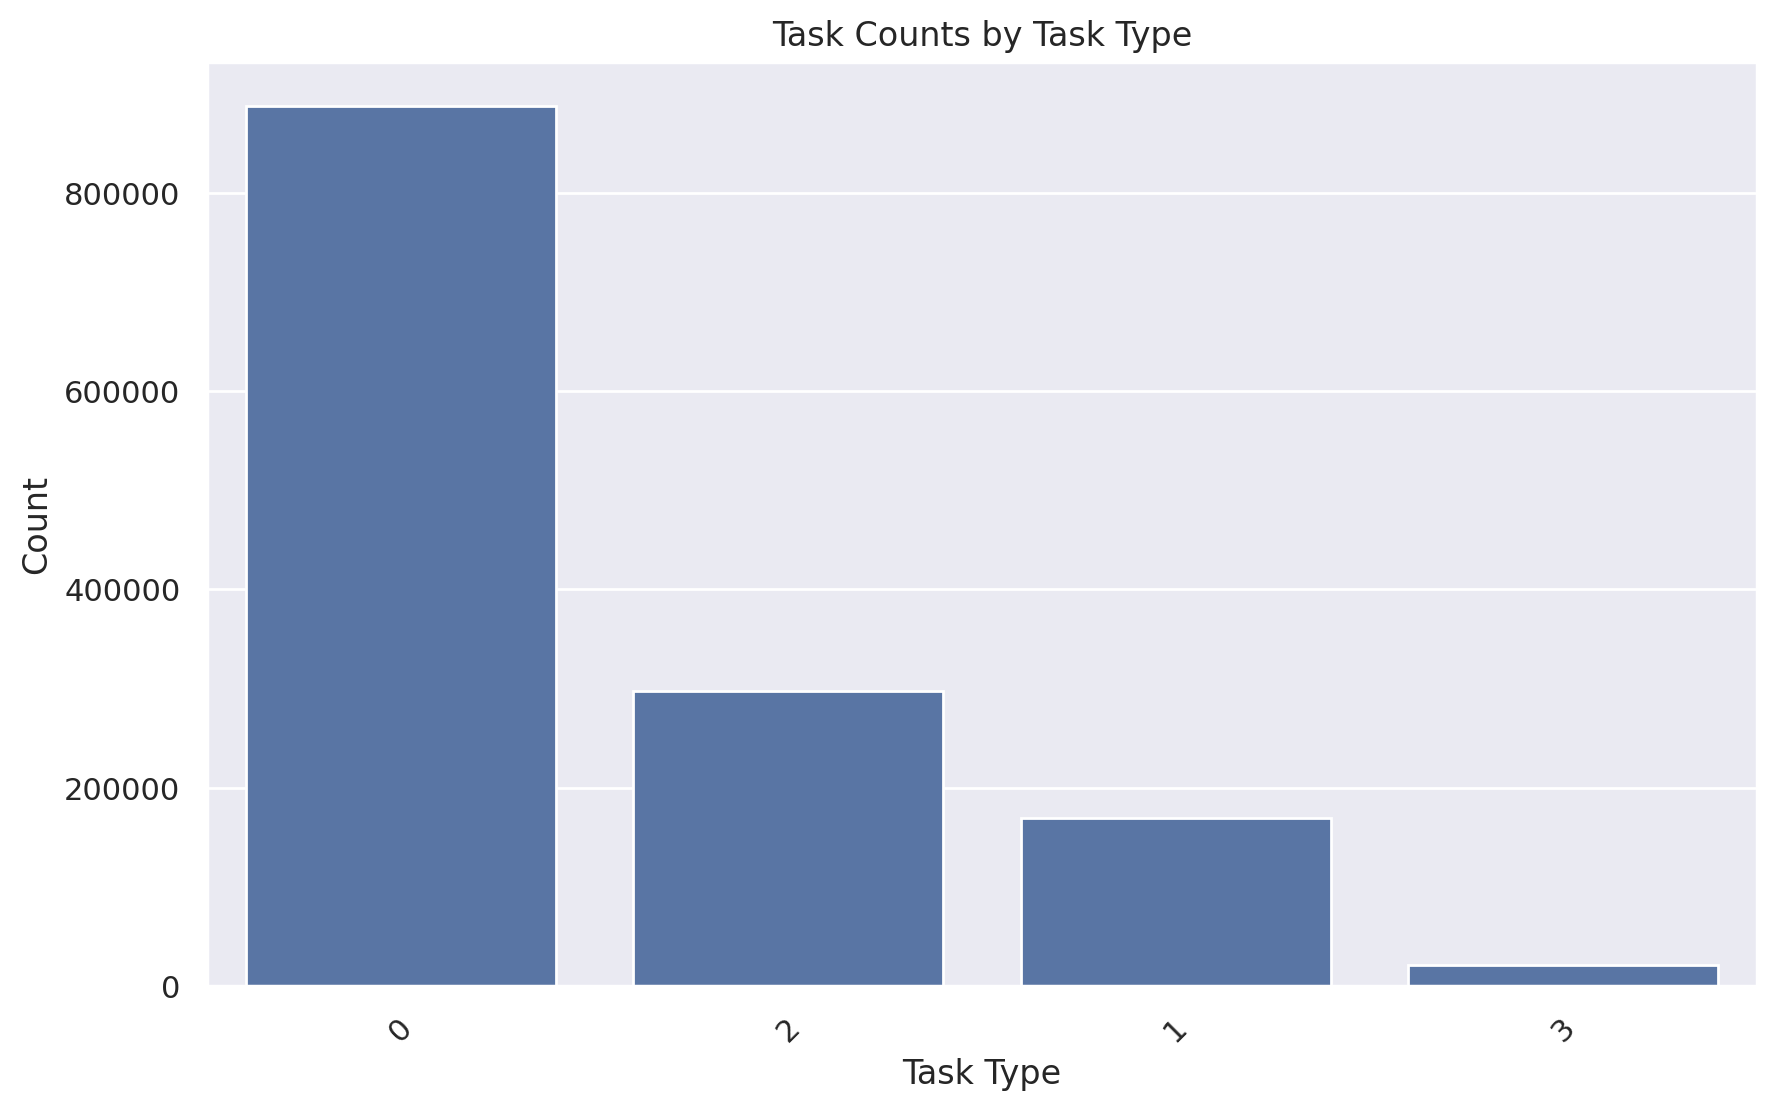

In [ ]:
#Task Counts by Task Type
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Task Type', order=merged_df['Task Type'].value_counts().index)
plt.title('Task Counts by Task Type')
plt.xlabel('Task Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

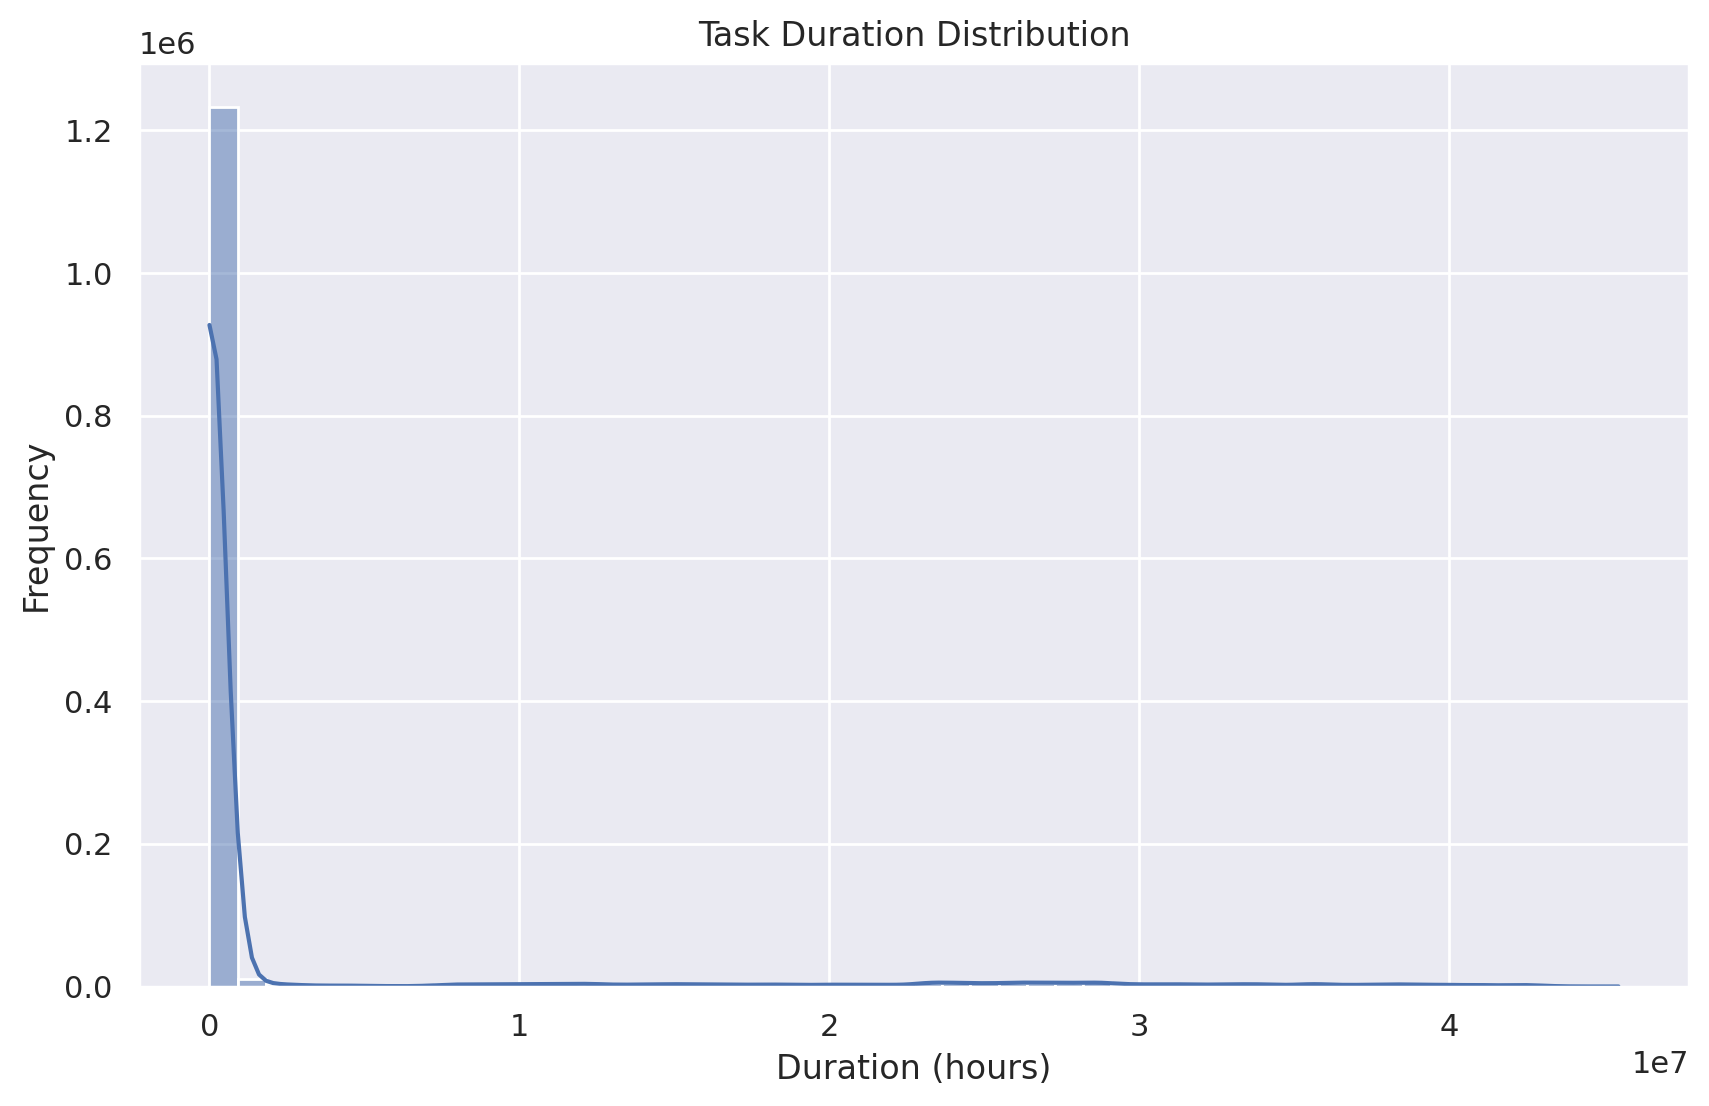

In [ ]:
# Task Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Task duration'].dropna(), bins=50, kde=True)
plt.title('Task Duration Distribution')
plt.xlabel('Duration (hours)')
plt.ylabel('Frequency')
plt.show()

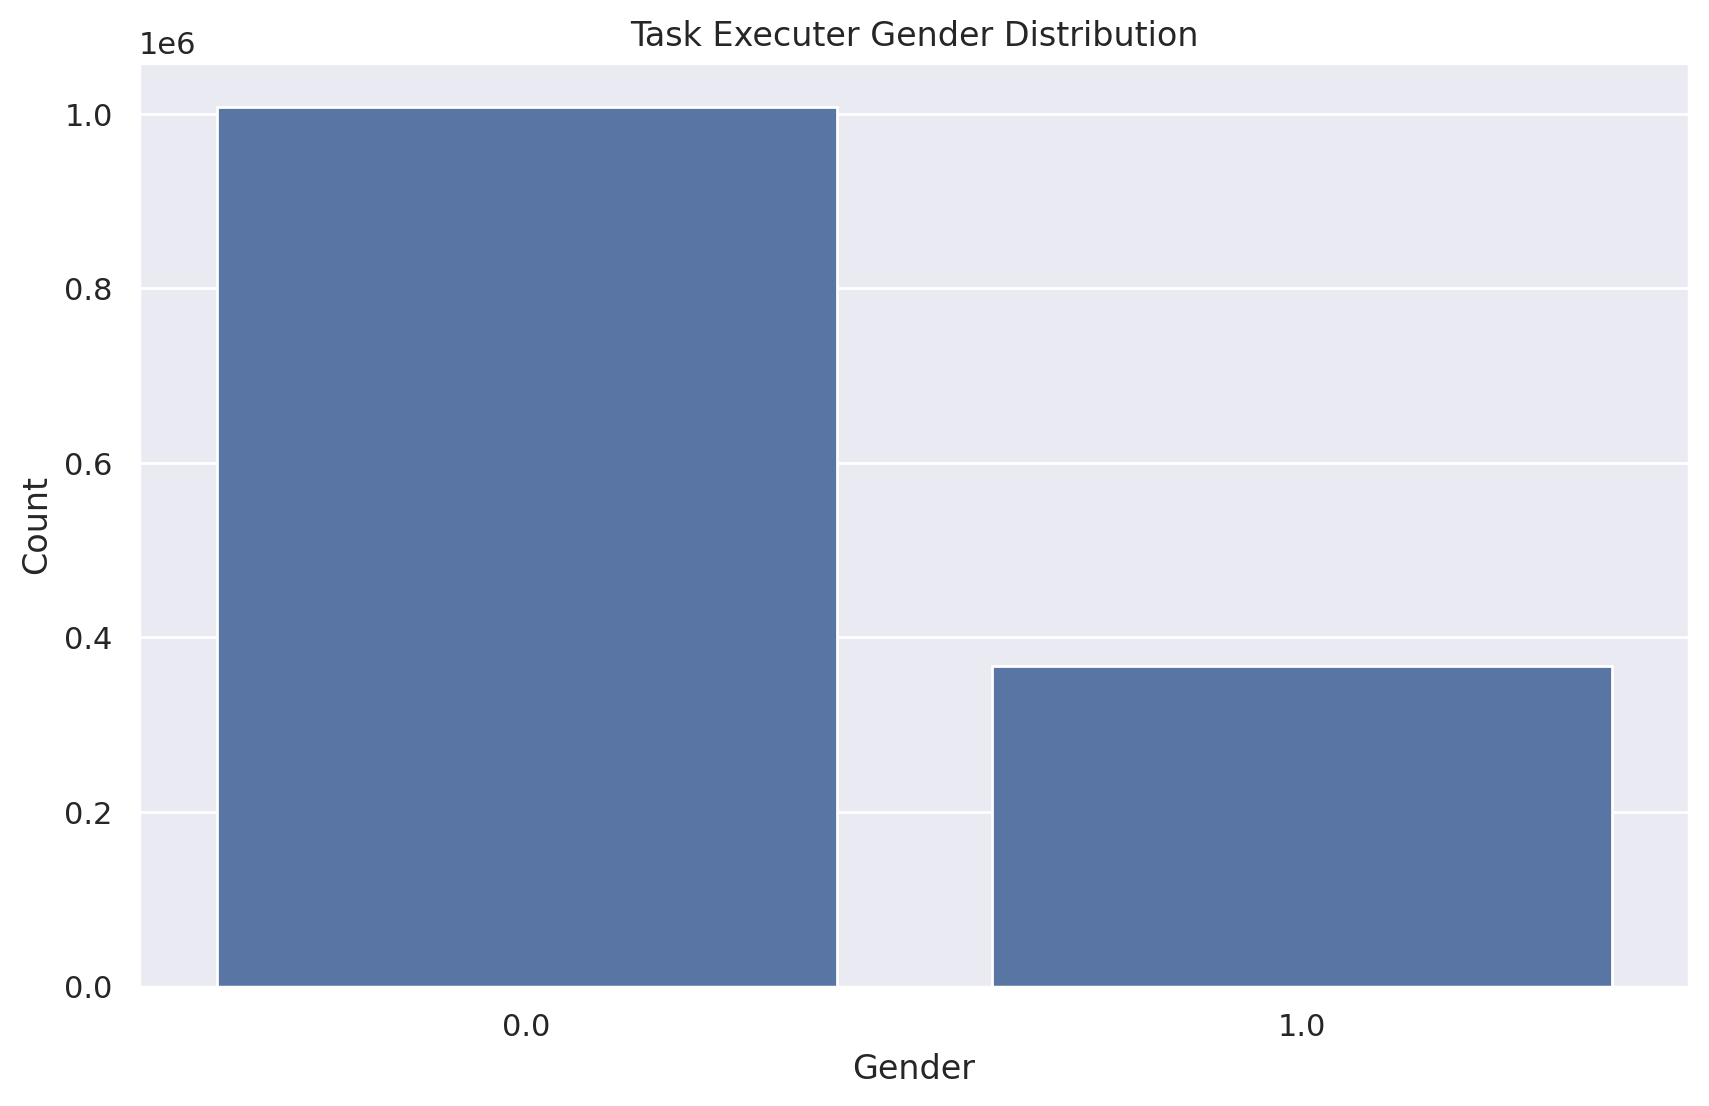

In [ ]:
# Task Executer Gender Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Sex_M')
plt.title('Task Executer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

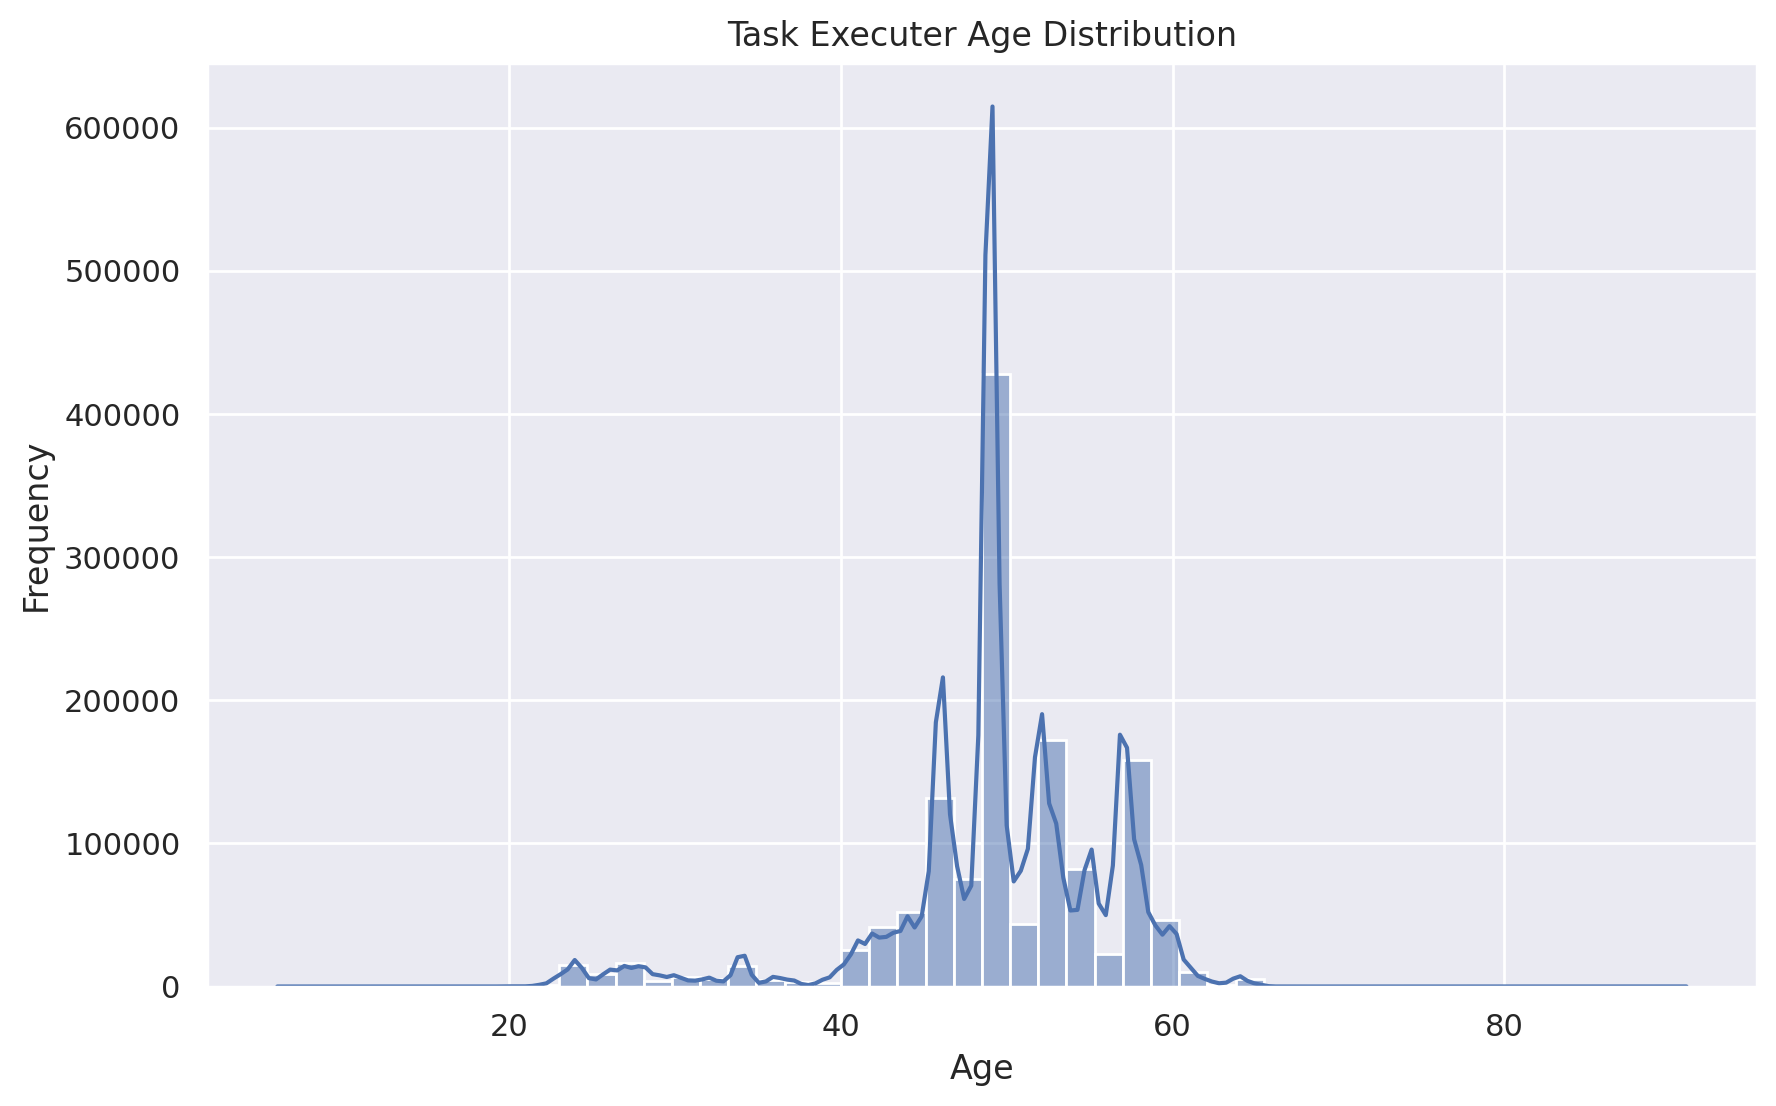

In [ ]:
# Task Executer Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Age'].dropna(), bins=50, kde=True)
plt.title('Task Executer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

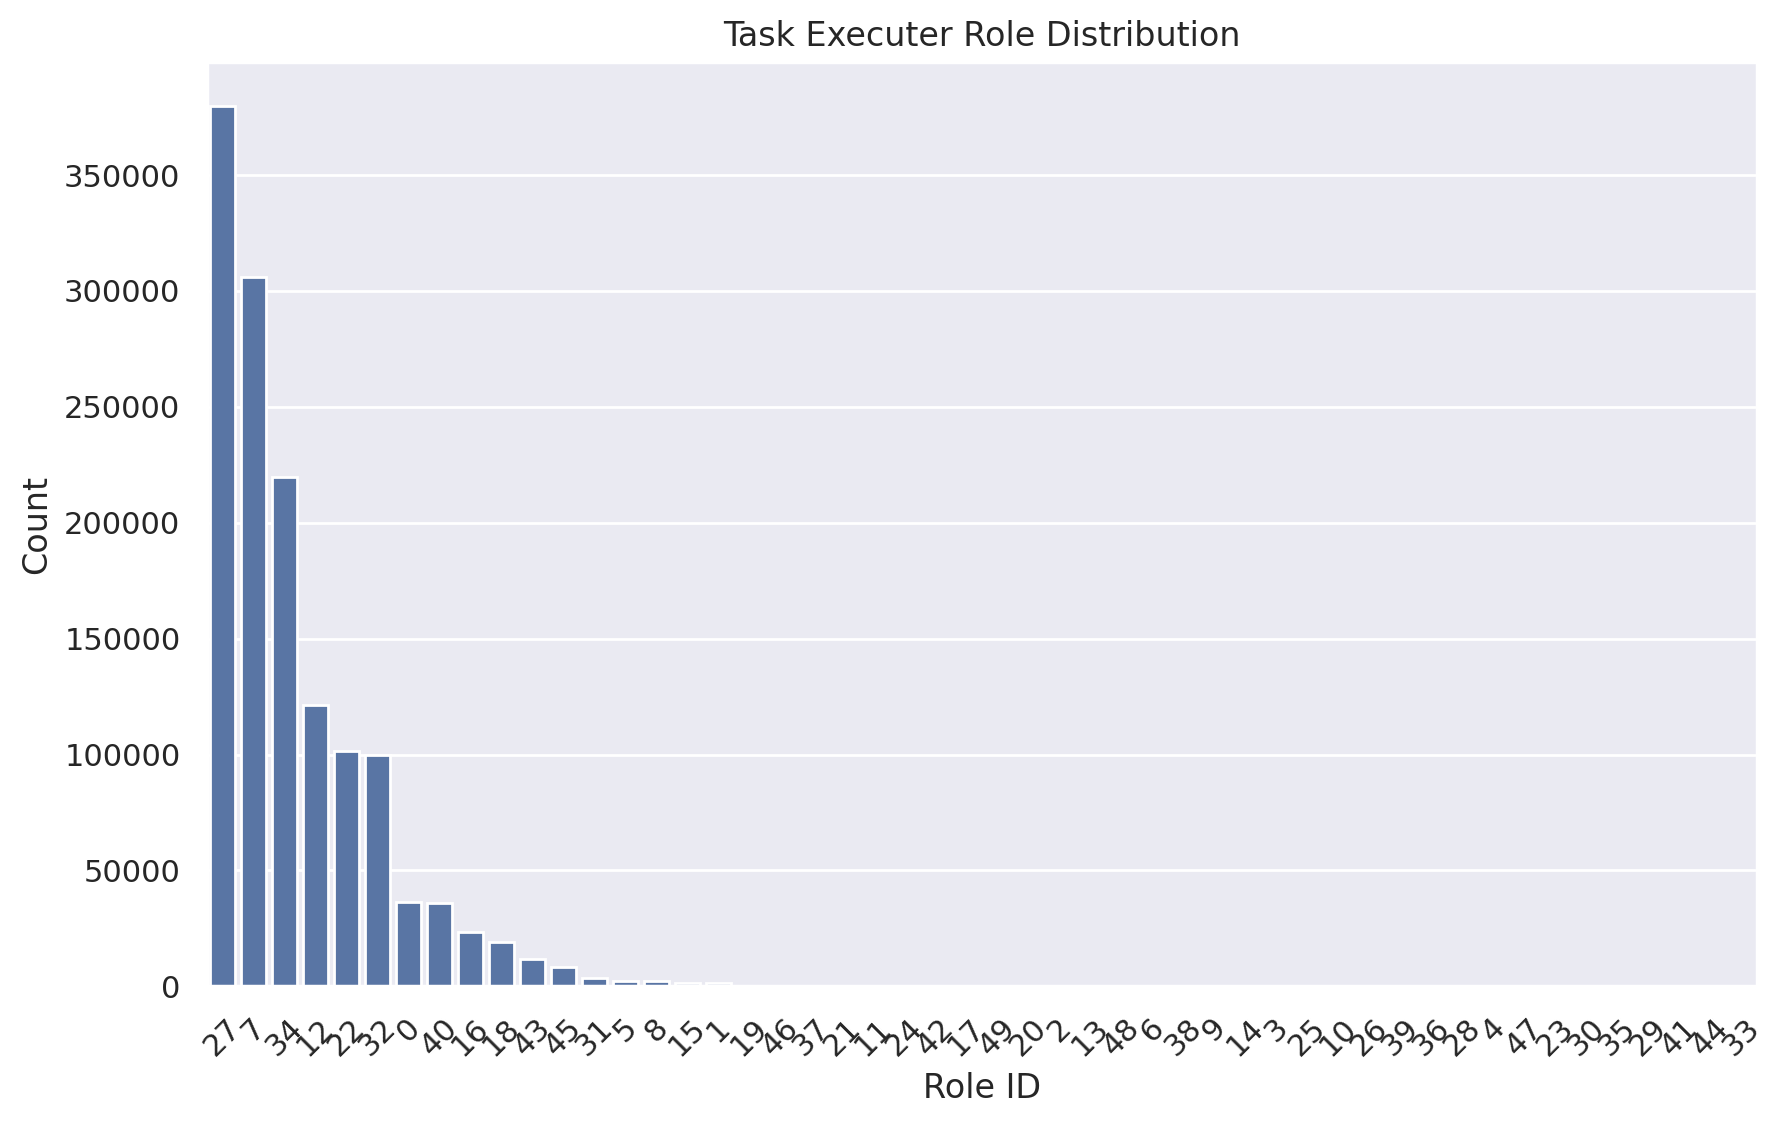

In [ ]:
# Task Executer Role Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Role ID', order=merged_df['Role ID'].value_counts().index)
plt.title('Task Executer Role Distribution')
plt.xlabel('Role ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

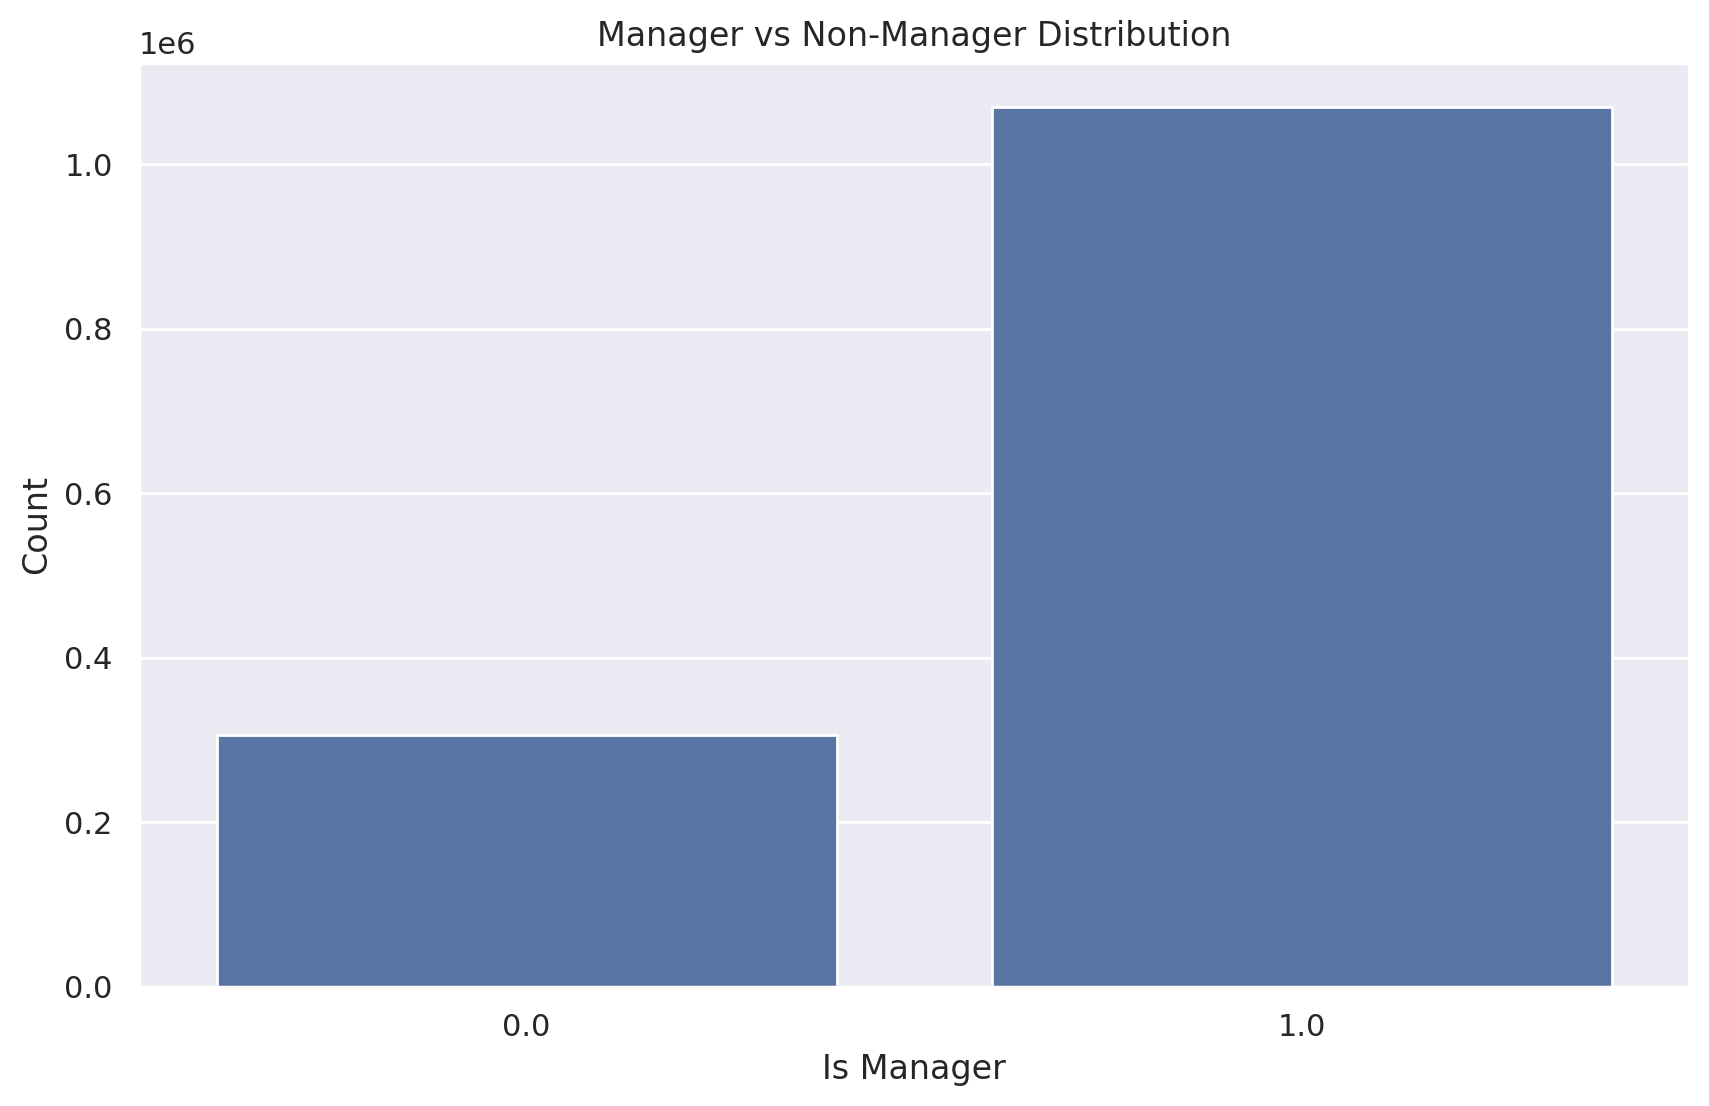

In [ ]:
# Manager vs Non-Manager Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='Is Manager_1')
plt.title('Manager vs Non-Manager Distribution')
plt.xlabel('Is Manager')
plt.ylabel('Count')
plt.show()

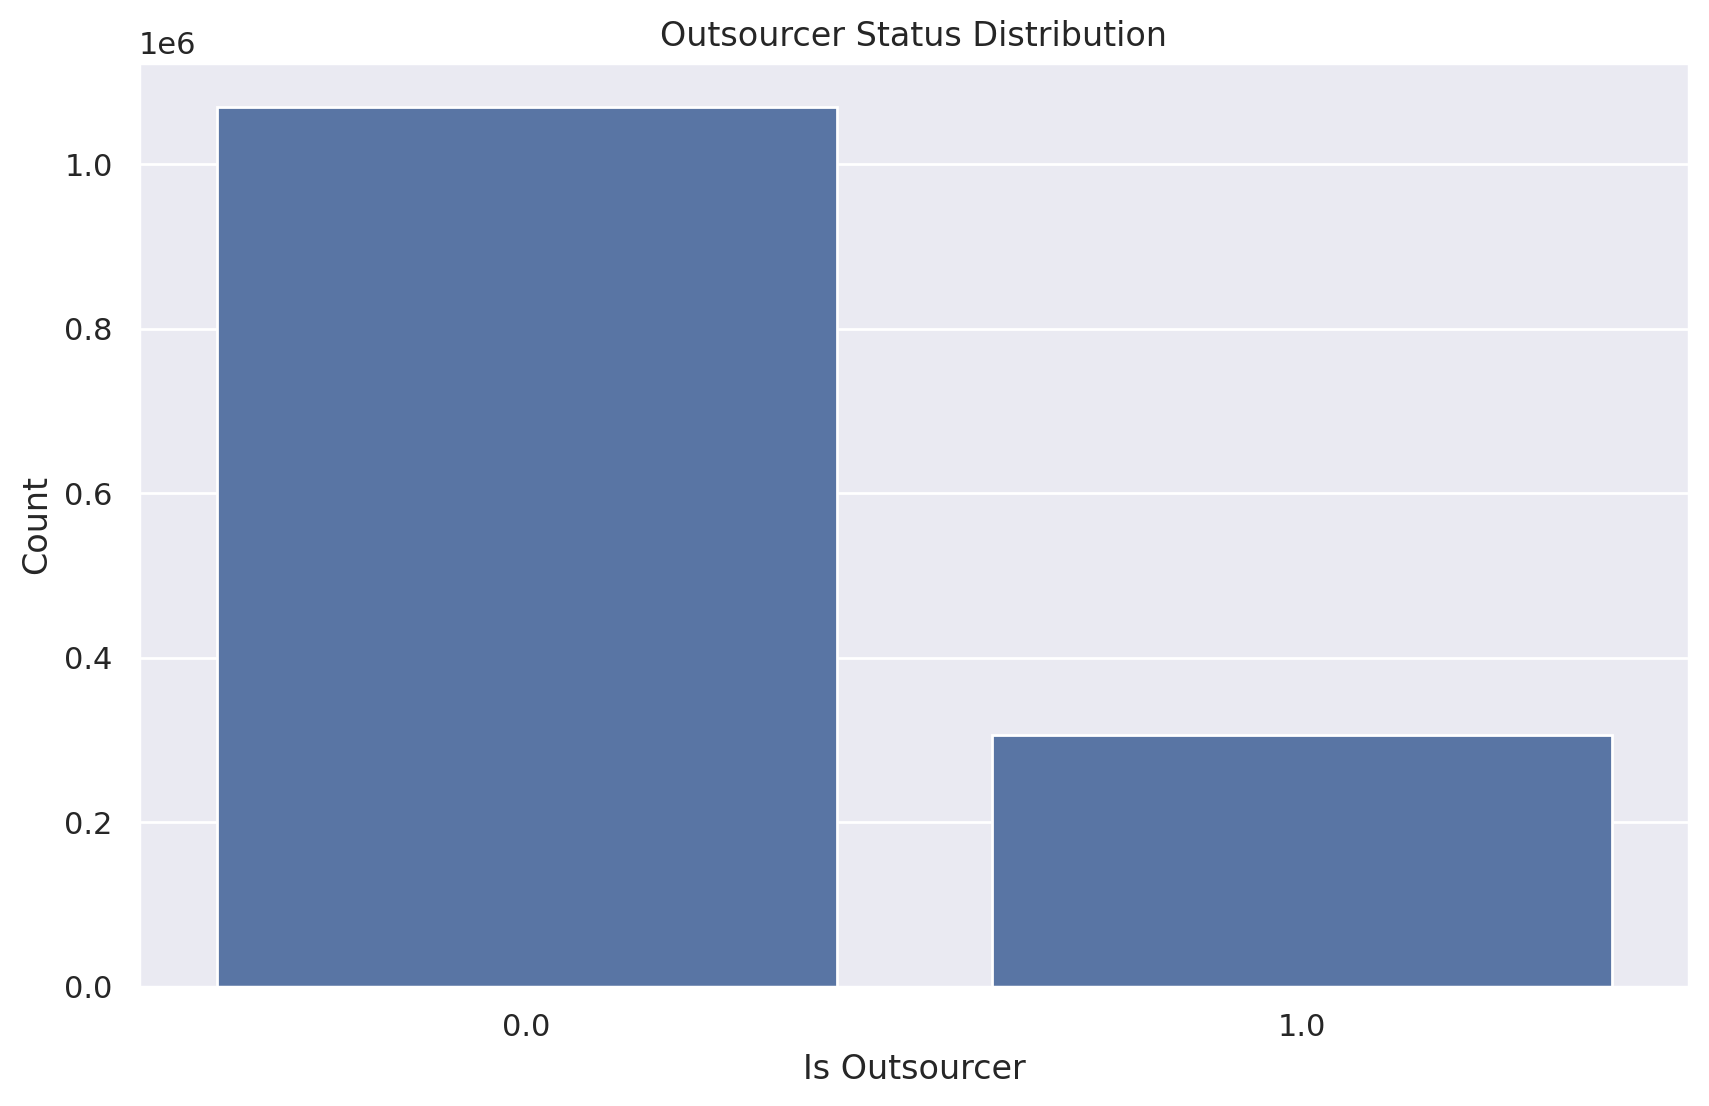

In [ ]:
# Outsourcer Status Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='IsOutSourcer_1')
plt.title('Outsourcer Status Distribution')
plt.xlabel('Is Outsourcer')
plt.ylabel('Count')
plt.show()

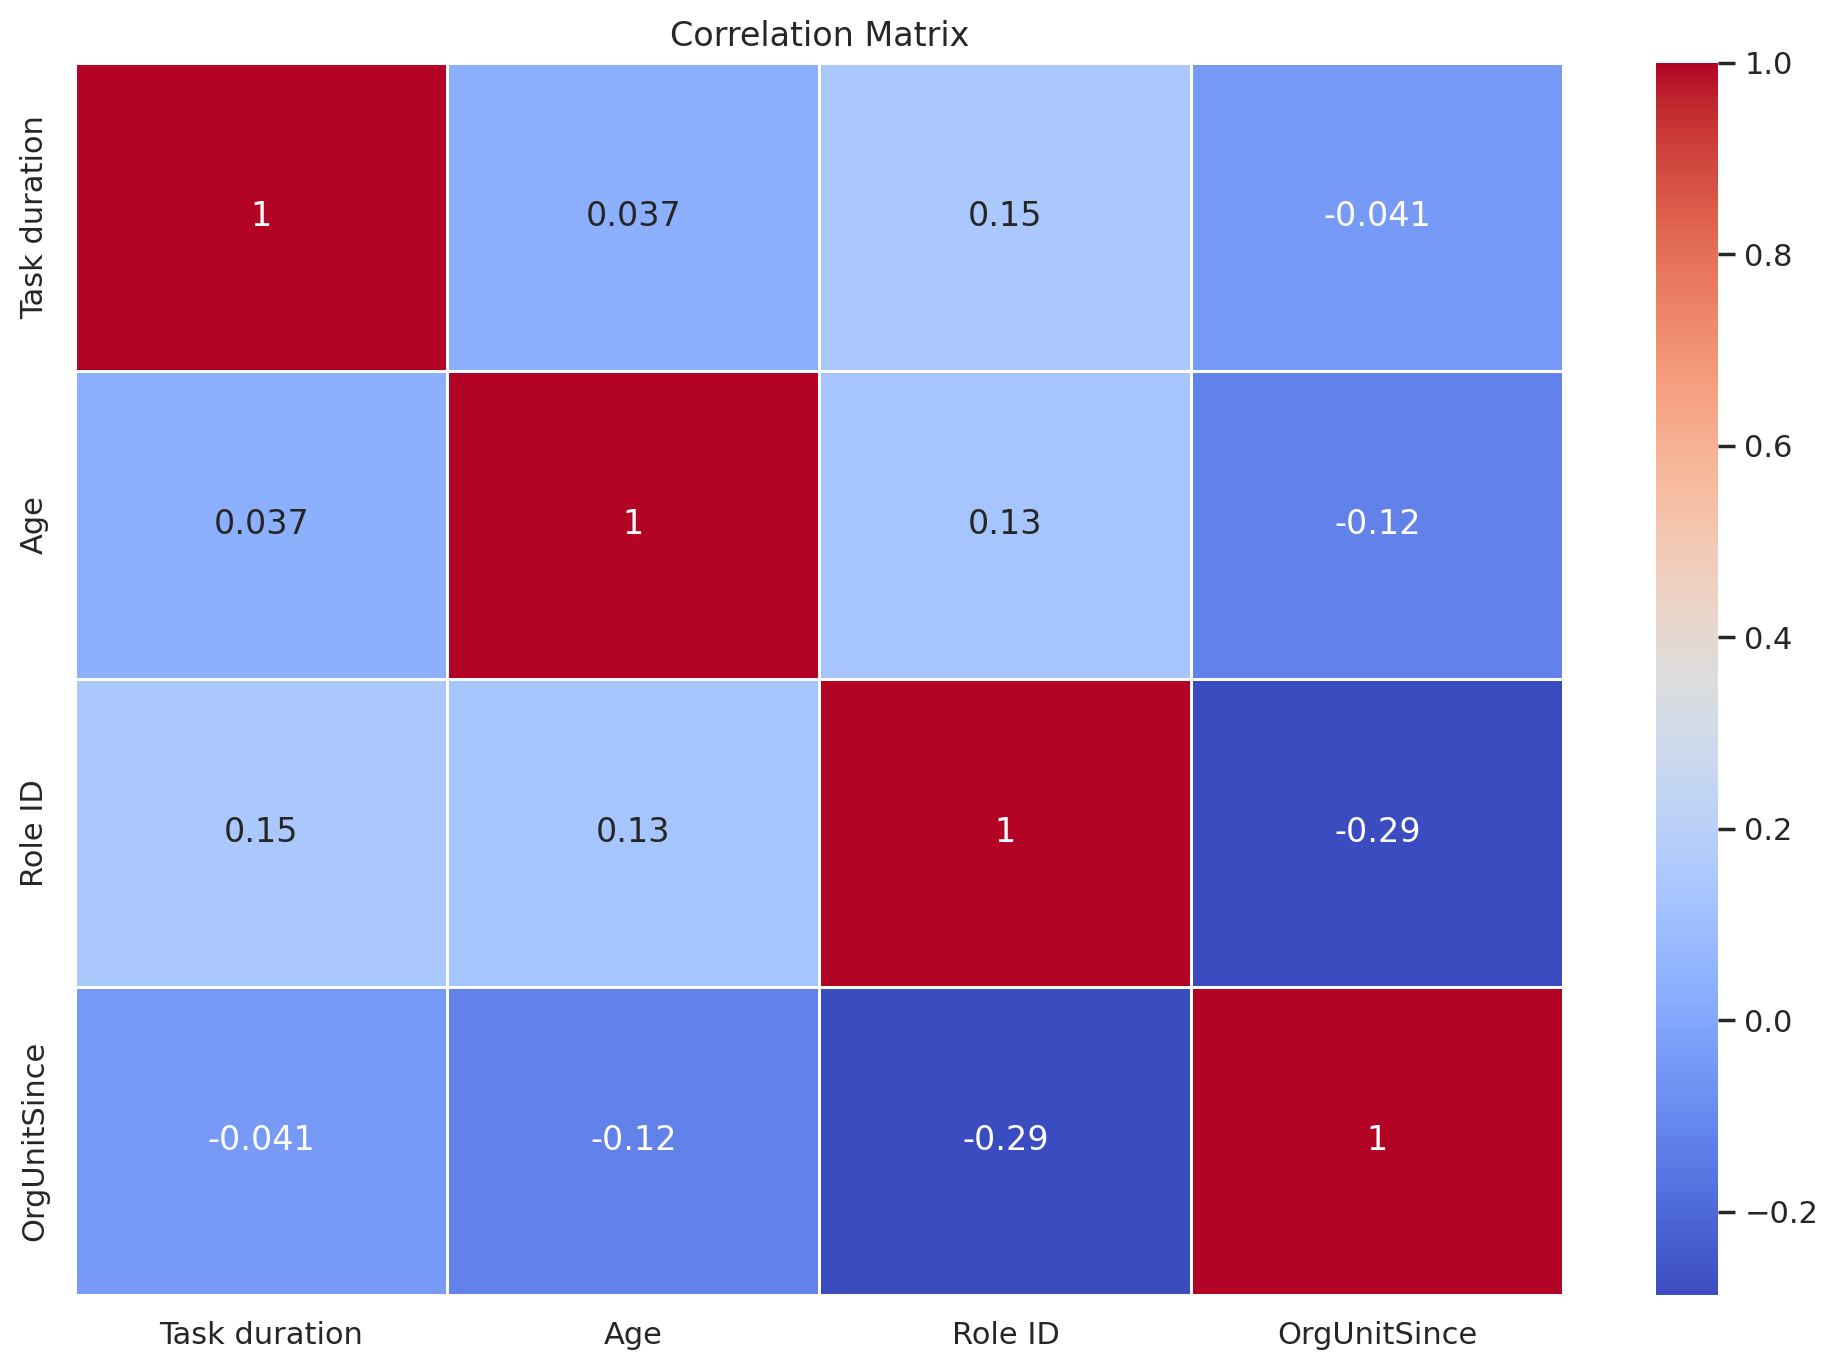

In [ ]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = merged_df[['Task duration', 'Age', 'Role ID', 'OrgUnitSince']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

##Modeling

###Spliting Data

In [ ]:
def check_data_split_distribution(X_train, X_test, y_train, y_test):
    print("Training set class distribution:")
    print(y_train.value_counts(normalize=True))
    print("\nTest set class distribution:")
    print(y_test.value_counts(normalize=True))

# Split data and check distribution for Task 102
X_train_102, X_test_102, y_train_102, y_test_102 = train_test_split(X_102_reduced, y_102, test_size=0.2, random_state=42)
check_data_split_distribution(X_train_102, X_test_102, y_train_102, y_test_102)

# Split data and check distribution for Task 105
X_train_105, X_test_105, y_train_105, y_test_105 = train_test_split(X_105_reduced, y_105, test_size=0.2, random_state=42)
check_data_split_distribution(X_train_105, X_test_105, y_train_105, y_test_105)


Training set class distribution:
idBPMApplicationAction
273.0     0.551702
275.0     0.247194
290.0     0.129947
271.0     0.053498
274.0     0.012215
301.0     0.003632
298.0     0.001762
8888.0    0.000017
270.0     0.000017
888.0     0.000017
Name: proportion, dtype: float64

Test set class distribution:
idBPMApplicationAction
273.0     0.551521
275.0     0.247187
290.0     0.129179
271.0     0.054635
274.0     0.012522
301.0     0.003236
298.0     0.001652
8888.0    0.000027
270.0     0.000027
888.0     0.000014
Name: proportion, dtype: float64
Training set class distribution:
idBPMApplicationAction
282.0    0.725020
273.0    0.136009
271.0    0.135201
298.0    0.002693
290.0    0.001077
Name: proportion, dtype: float64

Test set class distribution:
idBPMApplicationAction
282.0    0.727664
271.0    0.145318
273.0    0.123789
298.0    0.003229
Name: proportion, dtype: float64


###Standardization

In [ ]:
# Normalize the data
scaler_102 = StandardScaler()
X_train_102 = scaler_102.fit_transform(X_train_102)
X_test_102 = scaler_102.transform(X_test_102)

scaler_105 = StandardScaler()
X_train_105 = scaler_105.fit_transform(X_train_105)
X_test_105 = scaler_105.transform(X_test_105)


###Random Forests

In [ ]:
def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

    return model


# Train and evaluate model for Task 102
print("Task 102 Model")
task_102_model = train_and_evaluate_model(X_train_102, X_test_102, y_train_102, y_test_102)

# Train and evaluate model for Task 105
print("\nTask 105 Model")
task_105_model = train_and_evaluate_model(X_train_105, X_test_105, y_train_105, y_test_105)


Task 102 Model
              precision    recall  f1-score   support

       270.0       1.00      1.00      1.00         2
       271.0       1.00      0.96      0.98      4001
       273.0       0.99      1.00      1.00     40389
       274.0       1.00      0.97      0.99       917
       275.0       0.99      1.00      0.99     18102
       290.0       1.00      0.99      0.99      9460
       298.0       1.00      1.00      1.00       121
       301.0       1.00      0.96      0.98       237
       888.0       1.00      1.00      1.00         1
      8888.0       1.00      1.00      1.00         2

    accuracy                           0.99     73232
   macro avg       1.00      0.99      0.99     73232
weighted avg       0.99      0.99      0.99     73232

[[    2     0     0     0     0     0     0     0     0     0]
 [    0  3855    87     0    36    23     0     0     0     0]
 [    0     0 40319     0    61     9     0     0     0     0]
 [    0     0    23   890     4     0

In [ ]:
def cross_validate_model(df, target_column):
    X = df.drop([target_column, 'Task Id', 'Request Identifier', 'idBPMApplicationAction', 'idField', 'Value'], axis=1)
    y = df[target_column]

    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted')

    print(f"Cross-validation F1 scores: {cv_scores}")
    print(f"Mean F1 score: {cv_scores.mean()}")

    return cv_scores

# Cross-validate models for Task 102 and Task 105
print("Cross-validation for Task 102")
task_102_cv_scores = cross_validate_model(task_102_df, 'idBPMApplicationAction')

print("\nCross-validation for Task 105")
task_105_cv_scores = cross_validate_model(task_105_df, 'idBPMApplicationAction')


Cross-validation for Task 102
Cross-validation F1 scores: [0.08054929 0.11696021 0.02931908 0.00731498 0.04261337]
Mean F1 score: 0.0553513873026897

Cross-validation for Task 105
Cross-validation F1 scores: [0.62518102 0.68602154 0.60428289 0.63716229 0.63869264]
Mean F1 score: 0.6382680769231024


###Linear Regression

In [ ]:
def train_and_evaluate_regression_model(X_train, X_test, y_train, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
    print(f"R^2 Score: {r2_score(y_test, y_pred)}")

    return model

# Train and evaluate regression model for Task 102
print("Task 102 Regression Model")
task_102_regression_model = train_and_evaluate_regression_model(X_train_102, X_test_102, y_train_102, y_test_102)

# Train and evaluate regression model for Task 105
print("\nTask 105 Regression Model")
task_105_regression_model = train_and_evaluate_regression_model(X_train_105, X_test_105, y_train_105, y_test_105)


Task 102 Regression Model
Mean Squared Error: 1350.9018135615615
R^2 Score: 0.3459387132189874

Task 105 Regression Model
Mean Squared Error: 19.138288358124726
R^2 Score: 0.10386601905471338


###Neural Network

In [ ]:
def build_and_train_nn(X_train, y_train, X_test, y_test, epochs=50, batch_size=32):
    # Build the neural network model
    model = Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    return model, history

# Train and evaluate neural network model for Task 102
print("Task 102 Neural Network Model")
task_102_nn_model, task_102_history = build_and_train_nn(X_train_102, y_train_102, X_test_102, y_test_102)

# Train and evaluate neural network model for Task 105
print("\nTask 105 Neural Network Model")
task_105_nn_model, task_105_history = build_and_train_nn(X_train_105, y_train_105, X_test_105, y_test_105)


Task 102 Neural Network Model
Epoch 1/50
7324/7324 [==============================] - 31s 4ms/step - loss: 3221.1033 - val_loss: 89.6231
Epoch 2/50
7324/7324 [==============================] - 27s 4ms/step - loss: 1014.3113 - val_loss: 99.7066
Epoch 3/50
7324/7324 [==============================] - 28s 4ms/step - loss: 772.9163 - val_loss: 61.0438
Epoch 4/50
7324/7324 [==============================] - 26s 4ms/step - loss: 501.2466 - val_loss: 71.8914
Epoch 5/50
7324/7324 [==============================] - 26s 4ms/step - loss: 271.4966 - val_loss: 210.8683
Epoch 6/50
7324/7324 [==============================] - 27s 4ms/step - loss: 109.8071 - val_loss: 49.7277
Epoch 7/50
7324/7324 [==============================] - 27s 4ms/step - loss: 85.4321 - val_loss: 42.4716
Epoch 8/50
7324/7324 [==============================] - 26s 4ms/step - loss: 61.3225 - val_loss: 39.0264
Epoch 9/50
7324/7324 [==============================] - 28s 4ms/step - loss: 69.5251 - val_loss: 40.0656
Epoch 10/50
7324

In [ ]:
#More complex model atempt

def build_and_train_nn(X_train, y_train, X_test, y_test, epochs=100, batch_size=32):
    # Build the neural network model
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mse')

    # Implement early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1, callbacks=[early_stopping])

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")

    return model, history

# Train and evaluate neural network model for Task 102
print("Task 102 Neural Network Model")
task_102_nn_model, task_102_history = build_and_train_nn(X_train_102, y_train_102, X_test_102, y_test_102)

# Train and evaluate neural network model for Task 105
print("\nTask 105 Neural Network Model")
task_105_nn_model, task_105_history = build_and_train_nn(X_train_105, y_train_105, X_test_105, y_test_105)


Task 102 Neural Network Model
Epoch 1/100
7324/7324 [==============================] - 33s 4ms/step - loss: 3991.8296 - val_loss: 136.9303
Epoch 2/100
7324/7324 [==============================] - 30s 4ms/step - loss: 2801.9536 - val_loss: 122.4501
Epoch 3/100
7324/7324 [==============================] - 31s 4ms/step - loss: 2729.3167 - val_loss: 76.6102
Epoch 4/100
7324/7324 [==============================] - 31s 4ms/step - loss: 2491.7629 - val_loss: 213.8197
Epoch 5/100
7324/7324 [==============================] - 29s 4ms/step - loss: 1916.3954 - val_loss: 187.7332
Epoch 6/100
7324/7324 [==============================] - 31s 4ms/step - loss: 1850.3375 - val_loss: 317.7201
Epoch 7/100
7324/7324 [==============================] - 31s 4ms/step - loss: 1648.3571 - val_loss: 110.4642
Epoch 8/100
7324/7324 [==============================] - 32s 4ms/step - loss: 1429.4774 - val_loss: 52.8643
Epoch 9/100
7324/7324 [==============================] - 28s 4ms/step - loss: 1342.8921 - val_loss: 

##Evaluation

In [ ]:
def evaluate_classification_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

def evaluate_regression_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R^2 Score:", r2_score(y_test, y_pred))

def evaluate_nn_model(model, X_test, y_test):
    mse = model.evaluate(X_test, y_test)
    print("Mean Squared Error:", mse)

def evaluate_all_models(classification_models, regression_models, nn_models, X_tests, y_tests):
    print("Evaluation Metrics for Classification Models:")
    for model_name, model in classification_models.items():
        print(f"\nModel: {model_name}")
        evaluate_classification_model(model, X_tests[model_name], y_tests[model_name])

    print("\nEvaluation Metrics for Regression Models:")
    for model_name, model in regression_models.items():
        print(f"\nModel: {model_name}")
        evaluate_regression_model(model, X_tests[model_name], y_tests[model_name])

    print("\nEvaluation Metrics for Neural Network Models:")
    for model_name, model in nn_models.items():
        print(f"\nModel: {model_name}")
        evaluate_nn_model(model, X_tests[model_name], y_tests[model_name])

In [ ]:
classification_models = {
    'Task 102 Random Forest': task_102_model,
    'Task 105 Random Forest': task_105_model,
}
regression_models = {
    'Task 102 Linear Regression': task_102_regression_model,
    'Task 105 Linear Regression': task_105_regression_model,
}
nn_models = {
    'Task 102 Neural Network': task_102_nn_model,
    'Task 105 Neural Network': task_105_nn_model,
}
X_tests = {
    'Task 102 Random Forest': X_test_102,
    'Task 105 Random Forest': X_test_105,
    'Task 102 Linear Regression': X_test_102,
    'Task 105 Linear Regression': X_test_105,
    'Task 102 Neural Network': X_test_102,
    'Task 105 Neural Network': X_test_105,
}
y_tests = {
    'Task 102 Random Forest': y_test_102,
    'Task 105 Random Forest': y_test_105,
    'Task 102 Linear Regression': y_test_102,
    'Task 105 Linear Regression': y_test_105,
    'Task 102 Neural Network': y_test_102,
    'Task 105 Neural Network': y_test_105,
}

# Evaluate all models
evaluate_all_models(classification_models, regression_models, nn_models, X_tests, y_tests)

Evaluation Metrics for Classification Models:

Model: Task 102 Random Forest
Classification Report:
              precision    recall  f1-score   support

       270.0       1.00      1.00      1.00         2
       271.0       1.00      0.96      0.98      4001
       273.0       0.99      1.00      1.00     40389
       274.0       1.00      0.97      0.99       917
       275.0       0.99      1.00      0.99     18102
       290.0       1.00      0.99      0.99      9460
       298.0       1.00      1.00      1.00       121
       301.0       1.00      0.96      0.98       237
       888.0       1.00      1.00      1.00         1
      8888.0       1.00      1.00      1.00         2

    accuracy                           0.99     73232
   macro avg       1.00      0.99      0.99     73232
weighted avg       0.99      0.99      0.99     73232

Confusion Matrix:
[[    2     0     0     0     0     0     0     0     0     0]
 [    0  3855    87     0    36    23     0     0     0     